In [91]:
import pandas as pd
merged_df = pd.read_csv('../data/merged_outcomes_intakes.csv')

In [92]:
merged_df.shape

(135235, 12)

In [93]:
merged_df.head(10)

,animal_id,name,sex_upon_intake,age_upon_intake,datetime_intake,visit_count,intake_type,intake_condition,animal_type,breed,color,outcome_type
0,A006100,Scamp,Neutered Male,10 years,2017-12-07 14:07:00,3,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,Return to Owner
1,A047759,Oreo,Neutered Male,10 years,2014-04-02 15:55:00,1,Owner Surrender,Normal,Dog,Dachshund,Tricolor,Transfer
2,A134067,Bandit,Neutered Male,16 years,2013-11-16 09:02:00,1,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,Return to Owner
3,A141142,Bettie,Spayed Female,15 years,2013-11-16 14:46:00,1,Stray,Aged,Dog,Labrador Retriever/Pit Bull,Black/White,Return to Owner
4,A163459,Sasha,Intact Female,15 years,2014-11-14 15:11:00,1,Stray,Normal,Dog,Miniature Schnauzer Mix,Black/Gray,Return to Owner
5,A165752,Pep,Neutered Male,15 years,2014-09-15 11:28:00,1,Stray,Normal,Dog,Lhasa Apso Mix,Brown/White,Return to Owner
6,A178569,Boti,Neutered Male,15 years,2014-03-17 09:45:00,1,Public Assist,Normal,Dog,Shetland Sheepdog Mix,White/Black,Return to Owner
7,A189592,Ophelia,Spayed Female,18 years,2015-09-18 17:46:00,1,Stray,Normal,Dog,Shetland Sheepdog Mix,Brown/White,Return to Owner
8,A191351,Bri-Bri,Intact Female,16 years,2015-11-13 15:57:00,1,Stray,Normal,Cat,Domestic Longhair Mix,Black/White,Return to Owner
9,A197810,Sassafrass,Spayed Female,14 years,2014-12-08 12:30:00,1,Stray,Normal,Cat,American Shorthair Mix,Brown Tabby/White,Transfer


In [94]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type'],
      dtype='object')

In [95]:
print(merged_df.isnull().sum())

# name - 38897 missing values - ~28.7%
# sex_upon_intake - 1 missing value - Club in Unknown category
# outcome_type - 25 missing values - Create a new Unknown category for it

animal_id               0
name                38897
sex_upon_intake         1
age_upon_intake         0
datetime_intake         0
visit_count             0
intake_type             0
intake_condition        0
animal_type             0
breed                   0
color                   0
outcome_type           25
dtype: int64


In [96]:
merged_df['sex_upon_intake'].value_counts()

sex_upon_intake
Intact Male      46904
Intact Female    46356
Neutered Male    19620
Spayed Female    16751
Unknown           5603
Name: count, dtype: int64

In [97]:
merged_df['sex_upon_intake'] = merged_df['sex_upon_intake'].fillna("Unknown")

In [98]:
merged_df['sex_upon_intake'].value_counts()

sex_upon_intake
Intact Male      46904
Intact Female    46356
Neutered Male    19620
Spayed Female    16751
Unknown           5604
Name: count, dtype: int64

In [99]:
merged_df = merged_df.dropna(subset=["outcome_type"])

In [100]:
merged_df['outcome_type'].value_counts()

outcome_type
Adoption           64328
Transfer           44280
Return to Owner    19631
Euthanasia          4592
Died                1178
Rto-Adopt            897
Disposal             239
Missing               54
Relocate               8
Stolen                 2
Lost                   1
Name: count, dtype: int64

In [101]:
print(merged_df.isnull().sum())

animal_id               0
name                38889
sex_upon_intake         0
age_upon_intake         0
datetime_intake         0
visit_count             0
intake_type             0
intake_condition        0
animal_type             0
breed                   0
color                   0
outcome_type            0
dtype: int64


In [102]:
# Define the main categories we want to keep
main_outcomes = {
    "Adoption": "Adoption",
    "Rto-Adopt": "Adoption",   # merge into Adoption
    "Transfer": "Transfer",
    "Return to Owner": "Return to Owner",
    "Euthanasia": "Euthanasia",
    "Died": "Died",
}

# Map outcomes: keep the main ones, everything else -> "Other"
merged_df["outcome_type"] = merged_df["outcome_type"].map(
    lambda x: main_outcomes.get(x, "Other")
)

# Double check distribution
print(merged_df["outcome_type"].value_counts())


outcome_type
Adoption           65225
Transfer           44280
Return to Owner    19631
Euthanasia          4592
Died                1178
Other                304
Name: count, dtype: int64


In [103]:
merged_df

,animal_id,name,sex_upon_intake,age_upon_intake,datetime_intake,visit_count,intake_type,intake_condition,animal_type,breed,color,outcome_type
0,A006100,Scamp,Neutered Male,10 years,2017-12-07 14:07:00,3,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,Return to Owner
1,A047759,Oreo,Neutered Male,10 years,2014-04-02 15:55:00,1,Owner Surrender,Normal,Dog,Dachshund,Tricolor,Transfer
2,A134067,Bandit,Neutered Male,16 years,2013-11-16 09:02:00,1,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,Return to Owner
3,A141142,Bettie,Spayed Female,15 years,2013-11-16 14:46:00,1,Stray,Aged,Dog,Labrador Retriever/Pit Bull,Black/White,Return to Owner
4,A163459,Sasha,Intact Female,15 years,2014-11-14 15:11:00,1,Stray,Normal,Dog,Miniature Schnauzer Mix,Black/Gray,Return to Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
135230,A929598,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer
135231,A929599,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer
135232,A929600,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer
135233,A929602,NaN,Unknown,1 year,2025-05-02 12:22:00,1,Stray,Normal,Cat,Domestic Shorthair,Black,Transfer


In [104]:
# Has Name - 1, else 0

import pandas as pd
import re

def has_valid_name(name: str) -> int:
    """
    Return 1 if name looks like a valid given name, else 0.
    Implements the user-specified rules:
    - No digits, #, $, (, )
    - Length > 1
    - Not empty, NaN, or placeholders
    - Not generic group labels
    - Names starting with '*' are allowed
    """

    # Handle missing or NaN
    if pd.isna(name):
        return 0

    name_str = str(name).strip()
    if name_str == "" or name_str.isspace():
        return 0

    name_lower = name_str.lower()
        
    # if length <= 2 - return 0
    if len(name_lower) <= 2 :
        return 0
        
    # Preserve '*' names
    if name_str.startswith("*"):
        return 1

    # Rule 1: No numbers
    if any(char.isdigit() for char in name_lower):
        return 0

    # Rule 2: No # or $
    if "#" in name_lower or "$" in name_lower:
        return 0

    # Rule 3: No ( or )
    if "(" in name_lower or ")" in name_lower:
        return 0

    # Rule 4 & 5: invalid placeholders / generic labels
    invalid_terms = {
        "unknown", "unnamed", "no name", "nameless", "not named", "none",
        "stray", "animal", "dog", "puppy", "cat", "kitten",
        "male", "female", "litter", "deceased"
    }
    if name_lower in invalid_terms:
        return 0

    return 1

# Example usage:
# df["HasName"] = df["Name"].apply(has_valid_name)


In [105]:
# Applying this function to the name column:
merged_df["HasName"] = merged_df["name"].apply(has_valid_name)

In [106]:
import pandas as pd
import re

def clean_and_parse_age_days(df, col="age_upon_intake"):
    """
    Clean anomalies, fix plural issues, and parse age_upon_intake into age_days.
    
    Steps:
    1. Drop anomalies with negative ages.
    2. Normalize plurals like '1 years' -> '1 year', '1 weeks' -> '1 week'.
    3. Convert all ages to days (integer).
    
    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    col : str
        Column name containing age strings.
    
    Returns
    -------
    df : pd.DataFrame
        Dataframe with new column:
        - age_days
    """
    
    # Drop negative anomalies
    df = df[~df[col].astype(str).str.contains("-", na=False)].copy()
    
    # Fix plural issues for "1 unit"
    fixes = {
        r"\b1 years\b": "1 year",
        r"\b1 months\b": "1 month",
        r"\b1 weeks\b": "1 week",
        r"\b1 days\b": "1 day"
    }
    for wrong, right in fixes.items():
        df[col] = df[col].str.replace(wrong, right, regex=True)
    
    # Unit to days mapping
    unit_to_days = {"day": 1, "week": 7, "month": 30, "year": 365}
    
    def parse_age(age_str):
        if pd.isna(age_str) or str(age_str).strip() == "":
            return None
        match = re.match(r"(\d+)\s+(\w+)", str(age_str).lower())
        if not match:
            return None
        value, unit = int(match.group(1)), match.group(2).rstrip("s")
        return value * unit_to_days.get(unit, None)
    
    # Apply parser
    df["age_days_intake"] = df[col].apply(parse_age)
    
    return df

In [107]:
merged_df = clean_and_parse_age_days(merged_df, col="age_upon_intake")

In [108]:
import pandas as pd
merged_df['datetime_intake'] = pd.to_datetime(merged_df['datetime_intake'])

In [109]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake'],
      dtype='object')

In [110]:
merged_df = merged_df.reset_index(drop=True)
merged_df

,animal_id,name,sex_upon_intake,age_upon_intake,datetime_intake,visit_count,intake_type,intake_condition,animal_type,breed,color,outcome_type,HasName,age_days_intake
0,A006100,Scamp,Neutered Male,10 years,2017-12-07 14:07:00,3,Stray,Normal,Dog,Spinone Italiano Mix,Yellow/White,Return to Owner,1,3650
1,A047759,Oreo,Neutered Male,10 years,2014-04-02 15:55:00,1,Owner Surrender,Normal,Dog,Dachshund,Tricolor,Transfer,1,3650
2,A134067,Bandit,Neutered Male,16 years,2013-11-16 09:02:00,1,Public Assist,Injured,Dog,Shetland Sheepdog,Brown/White,Return to Owner,1,5840
3,A141142,Bettie,Spayed Female,15 years,2013-11-16 14:46:00,1,Stray,Aged,Dog,Labrador Retriever/Pit Bull,Black/White,Return to Owner,1,5475
4,A163459,Sasha,Intact Female,15 years,2014-11-14 15:11:00,1,Stray,Normal,Dog,Miniature Schnauzer Mix,Black/Gray,Return to Owner,1,5475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135201,A929598,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer,0,4
135202,A929599,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer,0,4
135203,A929600,NaN,Unknown,4 days,2025-05-02 12:22:00,1,Stray,Neonatal,Cat,Domestic Shorthair,Brown Tabby,Transfer,0,4
135204,A929602,NaN,Unknown,1 year,2025-05-02 12:22:00,1,Stray,Normal,Cat,Domestic Shorthair,Black,Transfer,0,365


In [111]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake'],
      dtype='object')

# Creating new features for datetime and visualizing them:

In [112]:
import pandas as pd

merged_df['datetime_intake'] = pd.to_datetime(merged_df['datetime_intake'])

# Month - Categorical
merged_df['intake_month'] = merged_df['datetime_intake'].dt.month_name()
merged_df['intake_month_num'] = merged_df['datetime_intake'].dt.month

# Day of Week (full name) - Categorical
merged_df['intake_weekday'] = merged_df['datetime_intake'].dt.day_name()
merged_df['intake_weekday_num'] = merged_df['datetime_intake'].dt.weekday

# Week Number of Year - Don't feed to model
merged_df['intake_week'] = merged_df['datetime_intake'].dt.isocalendar().week

# Hour of the Day - Don't feed to the model
merged_df['intake_hour'] = merged_df['datetime_intake'].dt.hour


# Quarter of the Year - Categorical
merged_df['intake_quarter'] = merged_df['datetime_intake'].dt.quarter

# Weekend flag with string weekdays - Categorical
merged_df['is_weekend'] = merged_df['intake_weekday'].apply(
    lambda x: "Weekend" if x in ["Saturday", "Sunday"] else "Weekday"
)

# Season (Winter, Spring, Summer, Fall) - Categorical
def get_season(month_name):
    if month_name in ['December', 'January', 'February']:
        return "Winter"
    elif month_name in ['March', 'April', 'May']:
        return "Spring"
    elif month_name in ['June', 'July', 'August']:
        return "Summer"
    else:
        return "Fall"

merged_df['intake_season'] = merged_df['intake_month'].apply(get_season)

# AM/PM - Categorical
merged_df['intake_am_pm'] = merged_df['intake_hour'].apply(lambda x: "AM" if x < 12 else "PM")

# Part of the Day - Categorical
def part_of_day(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
merged_df['intake_part_of_day'] = merged_df['intake_hour'].apply(part_of_day)

In [113]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day'],
      dtype='object')

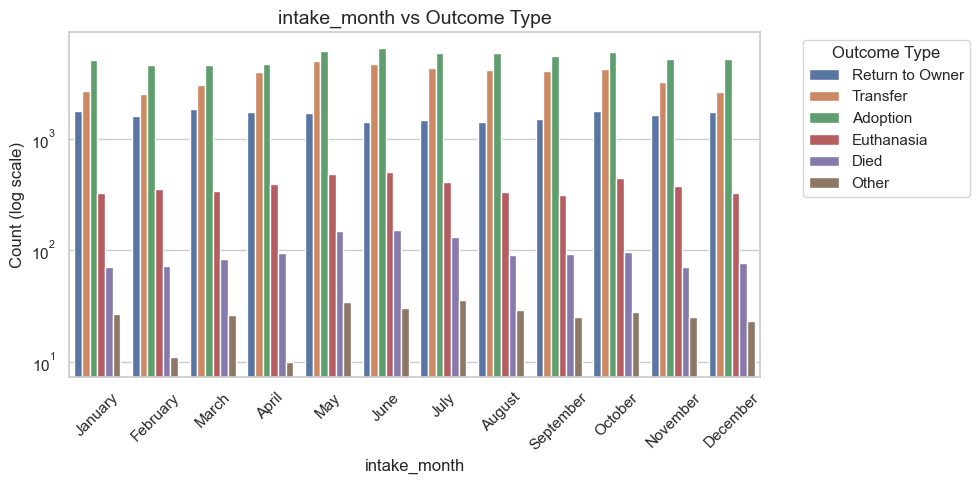

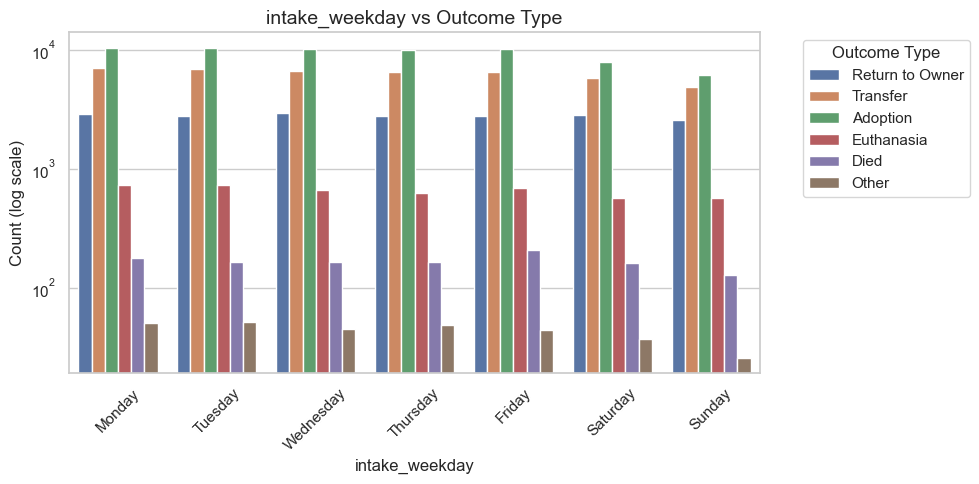

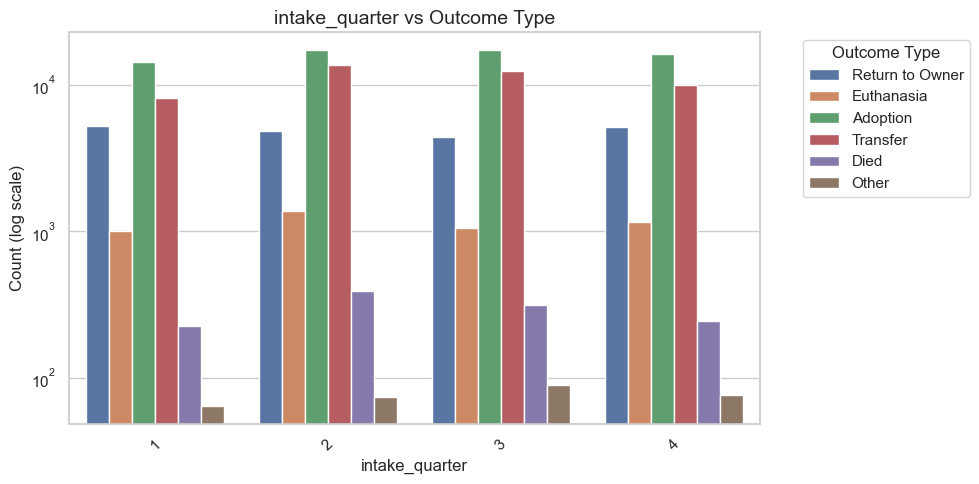

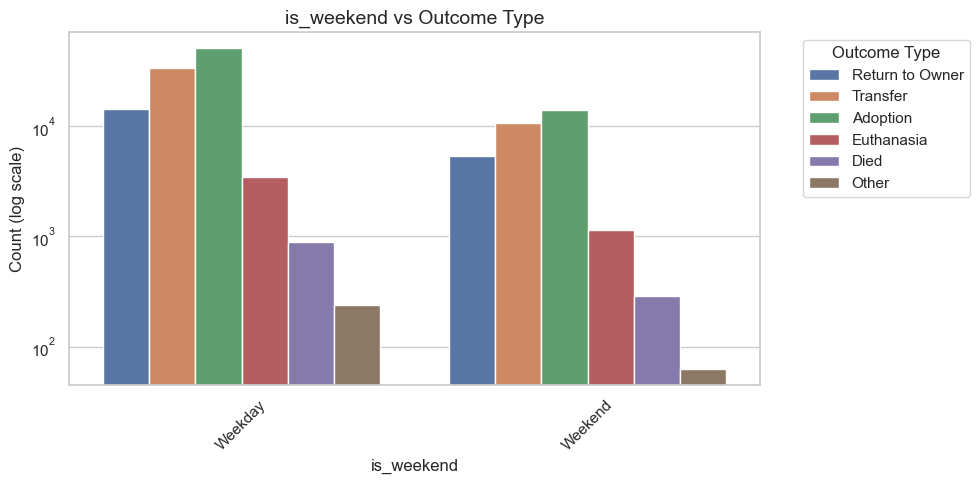

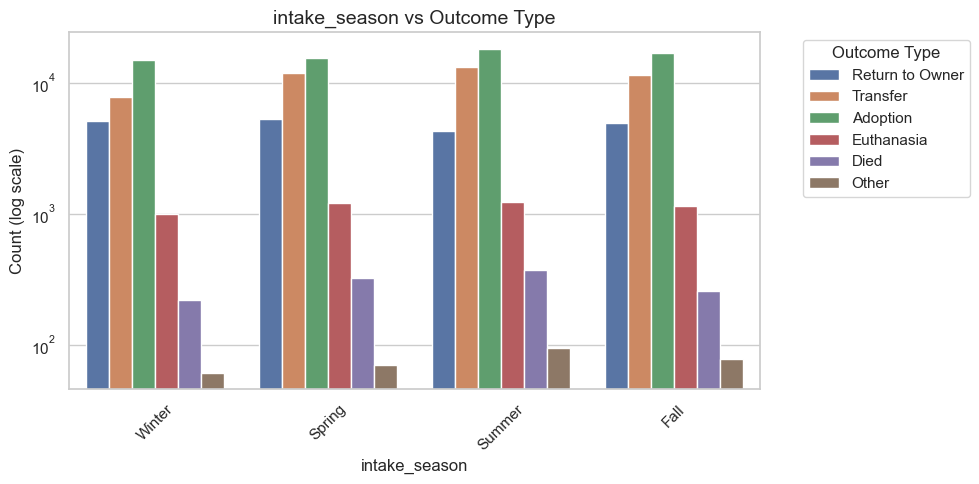

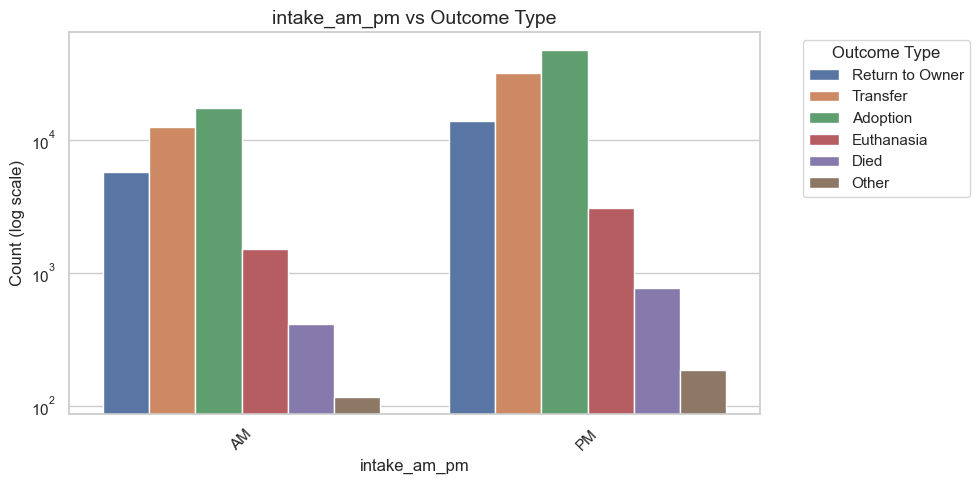

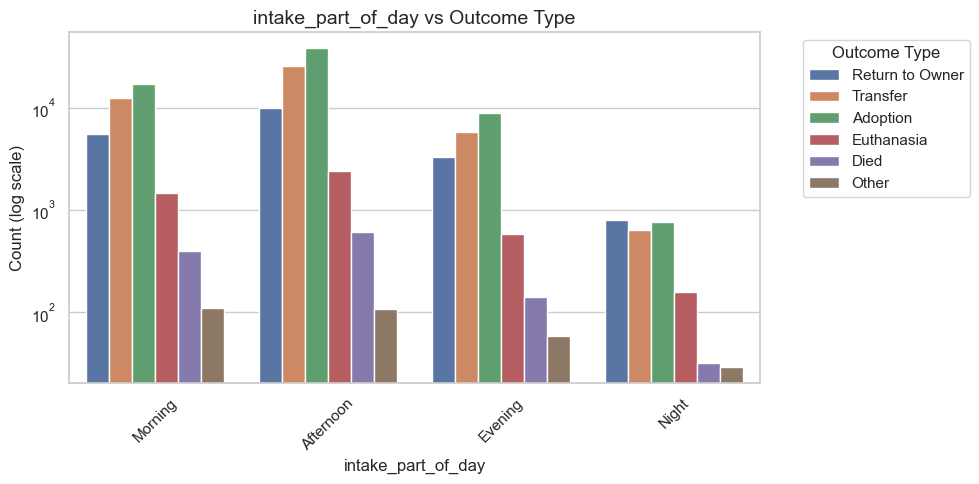

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define natural orderings
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
weekday_order = [
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
]
quarter_order = [1, 2, 3, 4]
weekend_order = ["Weekday","Weekend"]
season_order = ["Winter","Spring","Summer","Fall"]
ampm_order = ["AM","PM"]
partofday_order = ["Morning","Afternoon","Evening","Night"]

# Map features to their order
orders = {
    "intake_month": month_order,
    "intake_weekday": weekday_order,
    "intake_quarter": quarter_order,
    "is_weekend": weekend_order,
    "intake_season": season_order,
    "intake_am_pm": ampm_order,
    "intake_part_of_day": partofday_order
}

sns.set(style="whitegrid")

# Loop through features
for col in orders.keys():
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(
        data=merged_df,
        x=col,
        hue="outcome_type",
        order=orders[col]  # use natural order
    )
    plt.title(f"{col} vs Outcome Type", fontsize=14)
    plt.xticks(rotation=45)
    plt.yscale("log")   # natural log scale
    plt.ylabel("Count (log scale)")
    plt.legend(title="Outcome Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [115]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day'],
      dtype='object')

# Generating sex_upon_intake and intactness columns

In [116]:
# Define mapping dictionaries
intactness_mapping = {
    'Intact Male': 'intact',
    'Intact Female': 'intact',
    'Neutered Male': 'not_intact',
    'Spayed Female': 'not_intact',
    'Unknown': 'unknown'
}

sex_mapping = {
    'Intact Male': 'male',
    'Intact Female': 'female',
    'Neutered Male': 'male',
    'Spayed Female': 'female',
    'Unknown': 'unknown'
}

# Apply mappings
merged_df['intactness'] = merged_df['sex_upon_intake'].map(intactness_mapping)
merged_df['sex'] = merged_df['sex_upon_intake'].map(sex_mapping)

# Quick check
print(merged_df[['sex_upon_intake', 'intactness', 'sex']].head(10))


  sex_upon_intake  intactness     sex
0   Neutered Male  not_intact    male
1   Neutered Male  not_intact    male
2   Neutered Male  not_intact    male
3   Spayed Female  not_intact  female
4   Intact Female      intact  female
5   Neutered Male  not_intact    male
6   Neutered Male  not_intact    male
7   Spayed Female  not_intact  female
8   Intact Female      intact  female
9   Spayed Female  not_intact  female


In [117]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex'],
      dtype='object')

# Vizualizing Breed:

In [118]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
import seaborn as sns

# ---------- Setup ----------
plt.rcParams["figure.figsize"] = (12, 8)
sns.set(style="whitegrid")

In [120]:
import re
import numpy as np
import pandas as pd

# ---------- BREED SIMPLIFICATION ----------
# 1) Remove trailing " Mix" (case-insensitive, exact word before end)
def clean_breed(b):
    if pd.isna(b):
        return np.nan
    s = str(b)
    # remove ' Mix' at end (case-insensitive)
    s = re.sub(r'\s+Mix$', '', s, flags=re.IGNORECASE)
    # keep only first breed before '/'
    s = s.split('/')[0].strip()
    return s

# Apply to merged_df
merged_df['Simple_breed'] = merged_df['breed'].apply(clean_breed)

# Get counts of simplified breeds
breed_counts = merged_df['Simple_breed'].value_counts()

# Replace breeds with count < 10 by "Rare"
merged_df['Simple_breed'] = merged_df['Simple_breed'].apply(
    lambda x: "Rare" if pd.notna(x) and breed_counts[x] < 10 else x
)

# Quick check
print(merged_df['Simple_breed'].value_counts())

Simple_breed
Domestic Shorthair            49135
Labrador Retriever            10907
Pit Bull                      10870
Chihuahua Shorthair            8757
German Shepherd                5566
                              ...  
Kuvasz                           10
Saluki                           10
Affenpinscher                    10
Devon Rex                        10
Greater Swiss Mountain Dog       10
Name: count, Length: 187, dtype: int64


In [121]:
merged_df[merged_df['Simple_breed']=='Rare']

,animal_id,name,sex_upon_intake,age_upon_intake,datetime_intake,visit_count,intake_type,intake_condition,animal_type,breed,...,intake_week,intake_hour,intake_quarter,is_weekend,intake_season,intake_am_pm,intake_part_of_day,intactness,sex,Simple_breed
0,A006100,Scamp,Neutered Male,10 years,2017-12-07 14:07:00,3,Stray,Normal,Dog,Spinone Italiano Mix,...,49,14,4,Weekday,Winter,PM,Afternoon,not_intact,male,Rare
143,A348400,Sweet Pea,Spayed Female,14 years,2017-07-17 13:09:00,1,Stray,Normal,Cat,Scottish Fold Mix,...,29,13,3,Weekday,Summer,PM,Afternoon,not_intact,female,Rare
589,A498745,Peeps,Spayed Female,23 years,2020-08-31 07:46:00,1,Stray,Injured,Dog,Wolf Hybrid Mix,...,36,7,3,Weekday,Summer,AM,Morning,not_intact,female,Rare
836,A531394,Baxter,Neutered Male,11 years,2015-04-21 16:59:00,1,Stray,Normal,Dog,Dachshund Stan Mix,...,17,16,2,Weekday,Spring,PM,Afternoon,not_intact,male,Rare
858,A533106,Cookie,Intact Male,7 years,2014-07-02 17:29:00,1,Stray,Normal,Dog,Podengo Pequeno Mix,...,27,17,3,Weekday,Summer,PM,Evening,intact,male,Rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132980,A920788,Baby,Intact Female,2 years,2025-01-04 11:36:00,1,Owner Surrender,Normal,Dog,Kangal Mix,...,1,11,1,Weekend,Winter,AM,Morning,intact,female,Rare
133662,A923553,Olso,Intact Male,3 years,2025-02-04 14:15:00,1,Stray,Normal,Dog,Otterhound Mix,...,6,14,1,Weekday,Winter,PM,Afternoon,intact,male,Rare
133705,A923736,Jennifer,Spayed Female,4 years,2025-02-06 12:36:00,1,Owner Surrender,Normal,Dog,Belgian Tervuren,...,6,12,1,Weekday,Winter,PM,Afternoon,not_intact,female,Rare
133834,A924587,Blach,Intact Female,1 year,2025-02-12 13:17:00,1,Owner Surrender,Normal,Cat,Bombay,...,7,13,1,Weekday,Winter,PM,Afternoon,intact,female,Rare


In [122]:
merged_df['Simple_breed'].nunique()

187

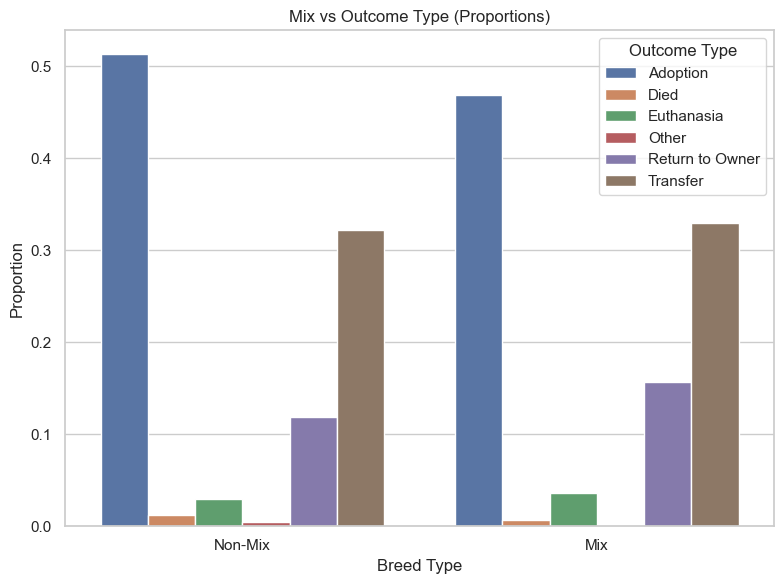

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add flag column: 1 if "Mix or /" in breed, else 0
merged_df['IsMix'] = merged_df['breed'].str.contains("Mix|/", case=False, na=False).astype(int)

# Compute counts
mix_counts = (
    merged_df
    .groupby(["IsMix", "outcome_type"])
    .size()
    .reset_index(name="count")
)

# Compute proportions within each IsMix group
mix_counts["proportion"] = mix_counts.groupby("IsMix")["count"].transform(lambda x: x / x.sum())

# Plot proportions
plt.figure(figsize=(8,6))
sns.barplot(x="IsMix", y="proportion", hue="outcome_type", data=mix_counts)
plt.title("Mix vs Outcome Type (Proportions)")
plt.xticks([0,1], ["Non-Mix", "Mix"])
plt.xlabel("Breed Type")
plt.ylabel("Proportion")
plt.legend(title="Outcome Type")
plt.tight_layout()
plt.show()

In [124]:
merged_df['IsMix'].value_counts()

IsMix
1    94879
0    40327
Name: count, dtype: int64

In [125]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix'],
      dtype='object')

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- BREED COARSENING ----------
# threshold >800 => keep, else "Exotic"
popular_threshold = 800
breed_counts = merged_df['Simple_breed'].value_counts()
popular_breeds = set(breed_counts[breed_counts > popular_threshold].index)

merged_df['breed_pop'] = np.where(
    merged_df['Simple_breed'].isin(popular_breeds),
    merged_df['Simple_breed'],
    'Exotic'
)

In [127]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_pop'],
      dtype='object')

In [128]:
merged_df['breed_pop'].value_counts()

breed_pop
Domestic Shorthair       49135
Exotic                   20986
Labrador Retriever       10907
Pit Bull                 10870
Chihuahua Shorthair       8757
German Shepherd           5566
Domestic Medium Hair      4593
Australian Cattle Dog     2525
Domestic Longhair         2143
Dachshund                 1838
Siamese                   1747
Siberian Husky            1615
Boxer                     1452
Border Collie             1413
Great Pyrenees            1305
Miniature Poodle          1204
Yorkshire Terrier         1054
Australian Shepherd       1046
Catahoula                  977
Beagle                     972
Miniature Schnauzer        917
Jack Russell Terrier       867
Rat Terrier                862
Cairn Terrier              834
Shih Tzu                   817
Rottweiler                 804
Name: count, dtype: int64

In [129]:
merged_df['breed_pop'].nunique()

26

<Axes: title={'center': 'Cat Breeds by Outcome (normalized, horizontal)'}, xlabel='Proportion', ylabel='breed_pop'>

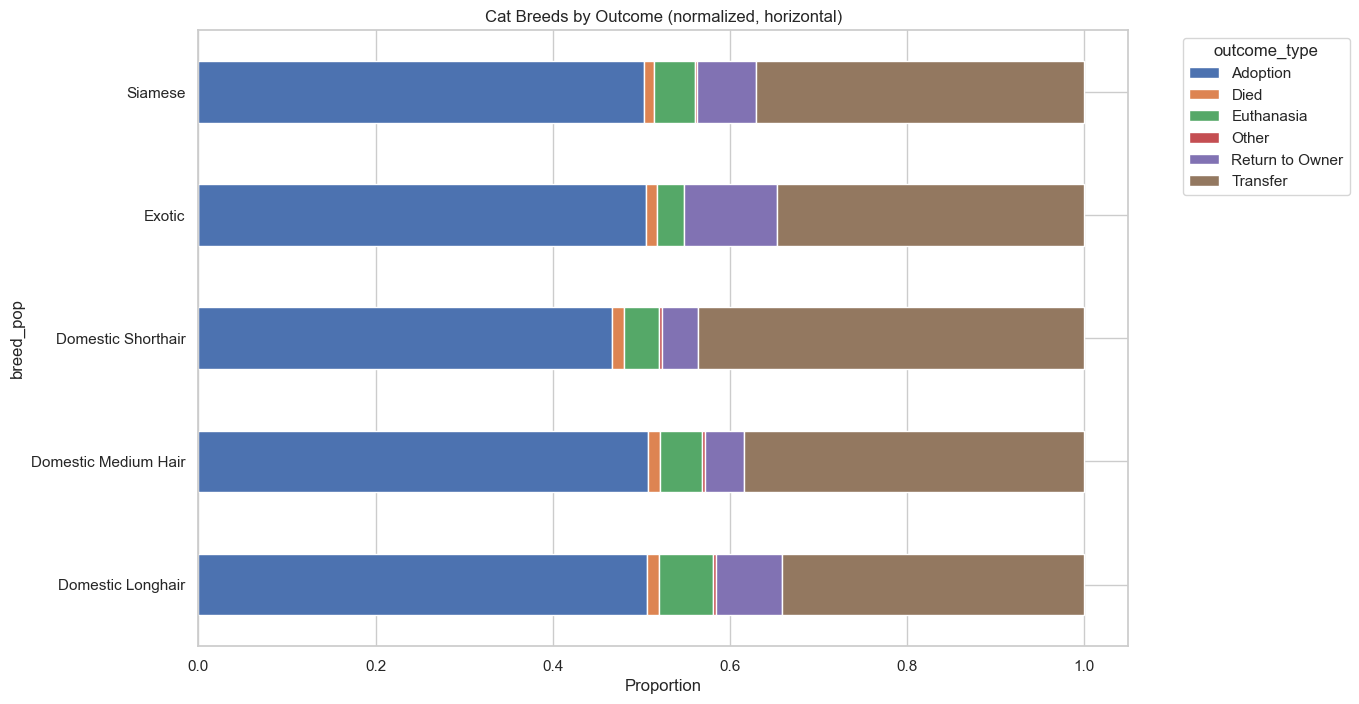

In [130]:
# ---------- HELPER: normalized stacked bar (horizontal version) ----------
def normalized_stacked_bar(data, x, hue, title,
                           order_x=None, order_hue=None, ax=None):
    if ax is None:
        ax = plt.gca()

    ctab = pd.crosstab(data[x], data[hue], normalize='index')

    if order_x is not None:
        order_x = [o for o in order_x if o in ctab.index]
        ctab = ctab.reindex(order_x)

    ctab.plot(kind='barh', stacked=True, ax=ax)  # no figsize here

    ax.set_title(title)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(x)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

    return ax
    
# ---------- Outcome by breed, separately for Cats and Dogs ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# (A) Cats
normalized_stacked_bar(
    data=cats,
    x='breed_pop',
    hue='outcome_type',
    title="Cat Breeds by Outcome (normalized, horizontal)"
)

<Axes: title={'center': 'Dog Breeds by Outcome (normalized, horizontal)'}, xlabel='Proportion', ylabel='breed_pop'>

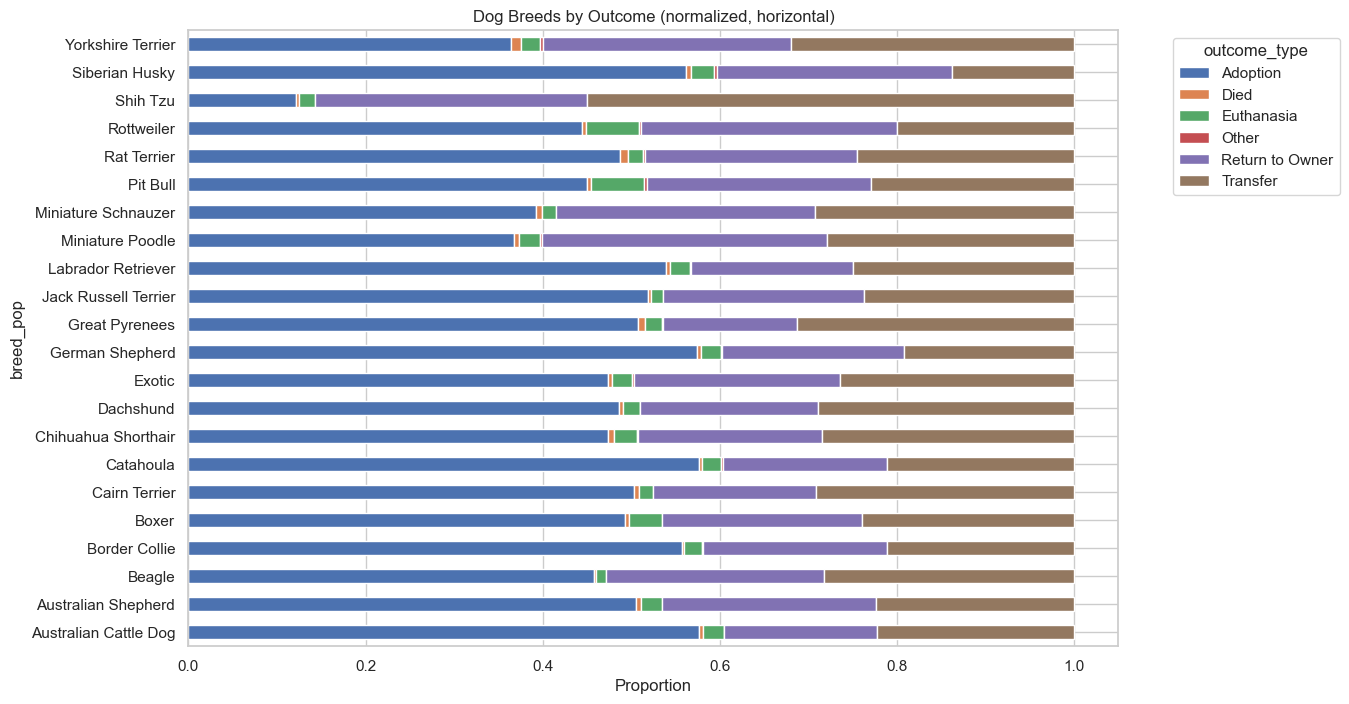

In [131]:
# (B) Dogs
normalized_stacked_bar(
    data=dogs,
    x='breed_pop',
    hue='outcome_type',
    title="Dog Breeds by Outcome (normalized, horizontal)"
)

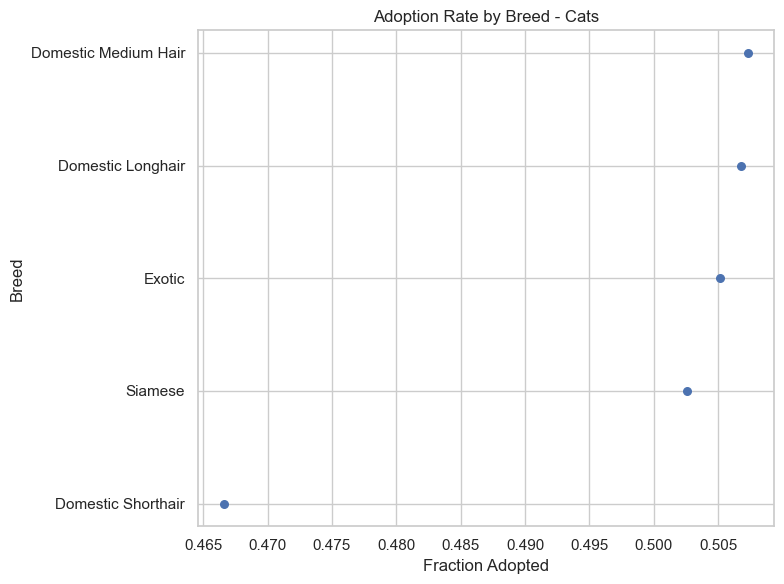

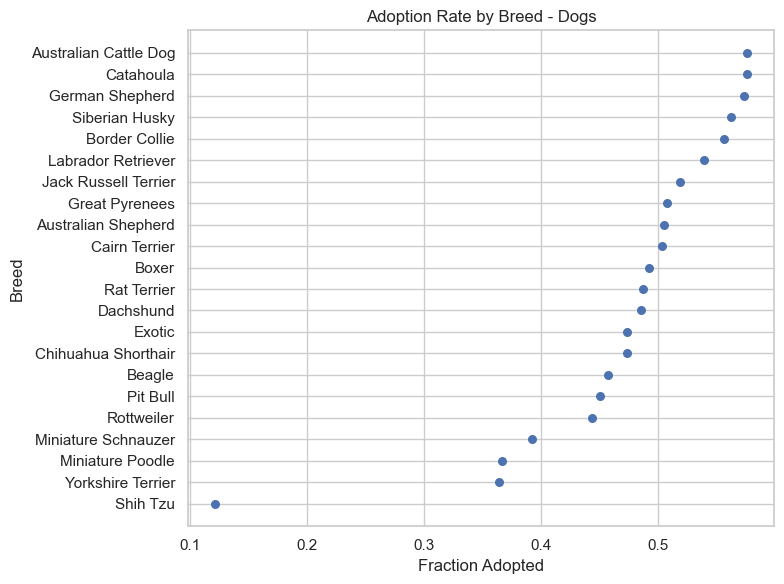

In [132]:
import matplotlib.pyplot as plt

# ---------- Cleveland dot plots: Adoption fraction by breed ----------
def fraction_by_outcome(data, group_col, outcome_col, outcome_value):
    # counts per group x outcome
    g = (data.groupby([group_col, outcome_col])
               .size()
               .reset_index(name='n'))
    # fraction within group
    g['frac'] = g.groupby(group_col)['n'].transform(lambda x: x / x.sum())
    # keep just the chosen outcome
    g = g[g[outcome_col] == outcome_value].copy()
    # order by fraction
    g = g.sort_values('frac', ascending=True)
    return g[[group_col, 'frac']]

# ---------- Outcome by breed, separately for Cats and Dogs ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# Cats: adoption fraction by breed
cats_adopt = fraction_by_outcome(
    cats, group_col='breed_pop', outcome_col='outcome_type', outcome_value='Adoption'
)

plt.figure(figsize=(8,6))
plt.scatter(cats_adopt['frac'], cats_adopt['breed_pop'], s=30)
plt.title("Adoption Rate by Breed - Cats")
plt.xlabel("Fraction Adopted")
plt.ylabel("Breed")
plt.tight_layout()
plt.show()

# Dogs: adoption fraction by breed
dogs_adopt = fraction_by_outcome(
    dogs, group_col='breed_pop', outcome_col='outcome_type', outcome_value='Adoption'
)

plt.figure(figsize=(8,6))
plt.scatter(dogs_adopt['frac'], dogs_adopt['breed_pop'], s=30)
plt.title("Adoption Rate by Breed - Dogs")
plt.xlabel("Fraction Adopted")
plt.ylabel("Breed")
plt.tight_layout()
plt.show()


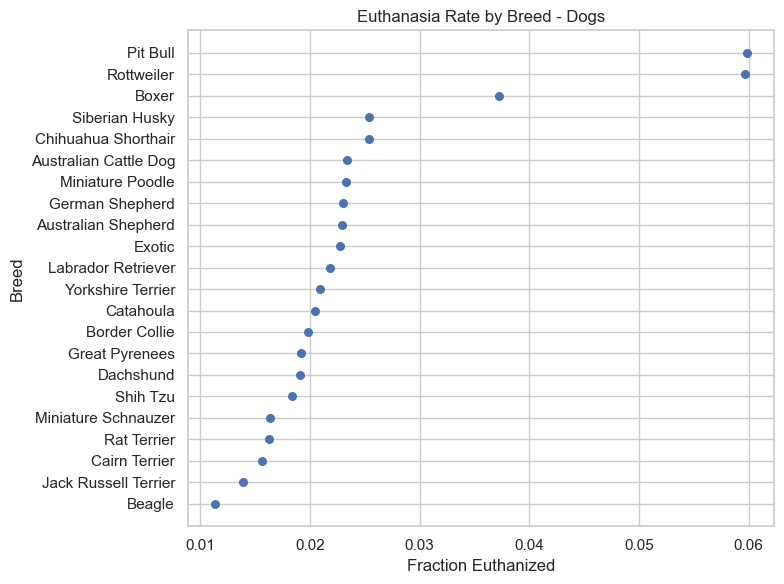

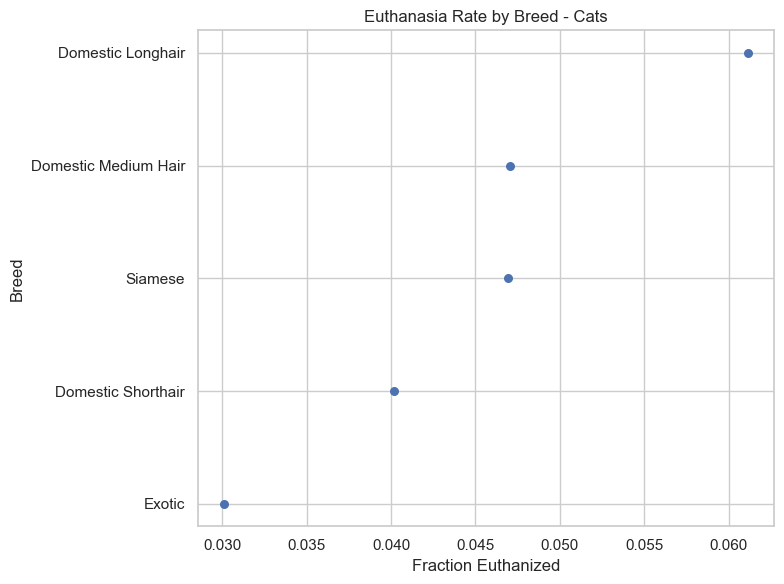

In [133]:
# Dogs: euthanasia fraction by breed
dogs_euth = fraction_by_outcome(
    dogs, group_col='breed_pop', outcome_col='outcome_type', outcome_value='Euthanasia'
)

plt.figure(figsize=(8,6))
plt.scatter(dogs_euth['frac'], dogs_euth['breed_pop'], s=30)
plt.title("Euthanasia Rate by Breed - Dogs")
plt.xlabel("Fraction Euthanized")
plt.ylabel("Breed")
plt.tight_layout()
plt.show()

# Cats: euthanasia fraction by breed
cats_euth = fraction_by_outcome(
    cats, group_col='breed_pop', outcome_col='outcome_type', outcome_value='Euthanasia'
)

plt.figure(figsize=(8,6))
plt.scatter(cats_euth['frac'], cats_euth['breed_pop'], s=30)
plt.title("Euthanasia Rate by Breed - Cats")
plt.xlabel("Fraction Euthanized")
plt.ylabel("Breed")
plt.tight_layout()
plt.show()


In [134]:
# Using your Simple_breed column
# Breed Popularity tier 

breed_freq = merged_df['Simple_breed'].value_counts()
merged_df['breed_frequency'] = merged_df['Simple_breed'].map(breed_freq)
# Or create categorical bins
merged_df['breed_popularity_tier'] = pd.cut(
    merged_df['breed_frequency'], 
    bins=[0, 100, 500, 2000, float('inf')],
    labels=['very_rare', 'uncommon', 'common', 'very_common']
)

In [135]:
merged_df['breed_popularity_tier']

0            uncommon
1              common
2           very_rare
3         very_common
4              common
             ...     
135201    very_common
135202    very_common
135203    very_common
135204    very_common
135205    very_common
Name: breed_popularity_tier, Length: 135206, dtype: category
Categories (4, object): ['very_rare' < 'uncommon' < 'common' < 'very_common']

In [136]:
merged_df = merged_df.drop(columns=["breed_pop", "breed_frequency"])
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier'],
      dtype='object')

In [137]:
def stacked_proportion_plot(data, x, hue, title, horizontal=True):
    ctab = pd.crosstab(data[x], data[hue], normalize='index')

    # Plot
    if horizontal:
        ctab.plot(kind='barh', stacked=True, figsize=(10, 6))
        plt.xlabel("Proportion")
        plt.ylabel(x)
    else:
        ctab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.ylabel("Proportion")
        plt.xlabel(x)

    plt.title(title)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


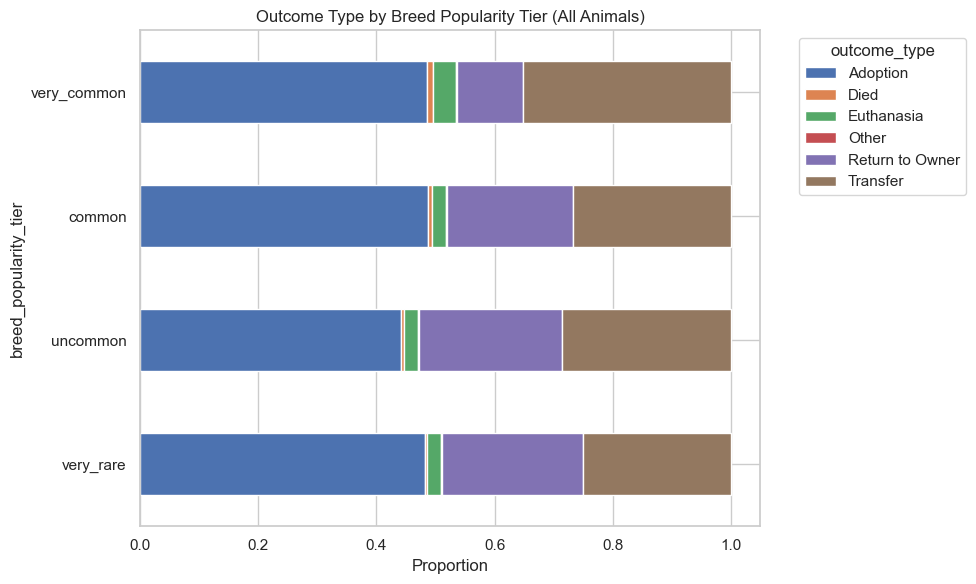

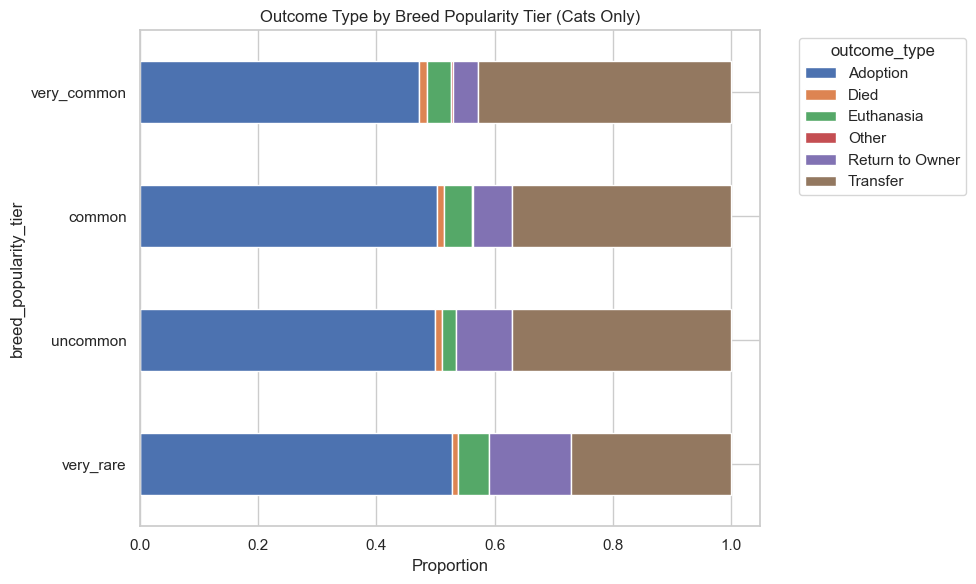

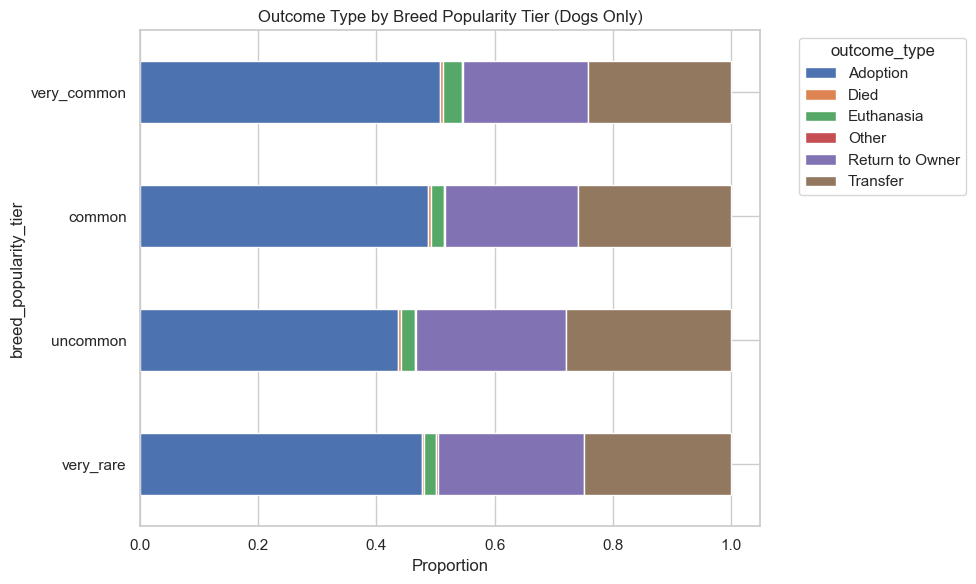

In [138]:
# Visualizing breed_popularity_tier vs Target

order = ["very_rare", "uncommon", "common", "very_common"]
merged_df["breed_popularity_tier"] = pd.Categorical(
    merged_df["breed_popularity_tier"], ordered=True, categories=order
)

# All animals

stacked_proportion_plot(
    merged_df,
    x="breed_popularity_tier",
    hue="outcome_type",
    title="Outcome Type by Breed Popularity Tier (All Animals)",
    horizontal=True
)

# Cats

cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()

stacked_proportion_plot(
    cats,
    x="breed_popularity_tier",
    hue="outcome_type",
    title="Outcome Type by Breed Popularity Tier (Cats Only)",
    horizontal=True
)


# Dogs

dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

stacked_proportion_plot(
    dogs,
    x="breed_popularity_tier",
    hue="outcome_type",
    title="Outcome Type by Breed Popularity Tier (Dogs Only)",
    horizontal=True
)


# Visualizing color:

In [139]:
print(merged_df['color'].value_counts())

color
Black/White               14078
Black                     11709
Brown Tabby                9022
White                      4947
Brown Tabby/White          4587
                          ...  
Torbie/Silver Tabby           1
Brown Tabby/Gold              1
Blue Merle/Brown Merle        1
Brown Tiger/Black             1
Blue Tiger/Black              1
Name: count, Length: 616, dtype: int64


In [140]:
print(merged_df['color'].nunique())

616


In [141]:
import numpy as np
import pandas as pd

# ---------- Simplify + Collapse Rare Colors ----------
def simplify_and_collapse_colors(df, col='color', new_col='Simple_color', threshold=300):
    out = df.copy()

    # Step 1: Simplify (take first token before '/')
    out[new_col] = out[col].apply(
        lambda c: np.nan if pd.isna(c) else str(c).split('/')[0].strip()
    )

    # Step 2: Collapse rare categories into "Other"
    counts = out[new_col].value_counts(dropna=False)
    keep = set(counts[counts > threshold].index)
    out[new_col] = np.where(out[new_col].isin(keep), out[new_col], 'Other')

    return out

# Apply to merged_df
merged_df = simplify_and_collapse_colors(merged_df, col='color', new_col='Simple_color', threshold=300)

# Quick check
print(merged_df['Simple_color'].value_counts())


Simple_color
Black            33031
White            17389
Brown Tabby      13776
Brown            10797
Tan               9147
Orange Tabby      6556
Blue              6535
Brown Brindle     3462
Blue Tabby        3458
Tricolor          3166
Red               3105
Tortie            2898
Calico            2786
Other             2361
Torbie            2208
Chocolate         1761
Cream Tabby       1561
Gray              1352
Cream             1322
Sable              973
Fawn               931
Lynx Point         871
Yellow             828
Buff               779
Gray Tabby         701
Seal Point         627
Blue Merle         609
Black Brindle      441
Orange             428
Flame Point        384
Black Tabby        335
Gold               327
Brown Merle        301
Name: count, dtype: int64


In [142]:
print(merged_df['Simple_color'].nunique())

33


In [143]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color'],
      dtype='object')

In [144]:
# ---------------- Cats ----------------
plt.figure(figsize=(10, 6))
normalized_stacked_bar(
    data=merged_df[merged_df['animal_type'] == 'Cat'],
    x='Simple_color',
    hue='outcome_type',
    title="Cat Colors by Outcome (normalized)",
)
plt.tight_layout()

fig = plt.gcf()  # get current figure
fig.savefig("../figures/cats_colors_outcome.png", dpi=300, bbox_inches="tight")
plt.close(fig)

# ---------------- Dogs ----------------
plt.figure(figsize=(10, 6))
normalized_stacked_bar(
    data=merged_df[merged_df['animal_type'] == 'Dog'],
    x='Simple_color',
    hue='outcome_type',
    title="Dog Colors by Outcome (normalized)",
)
plt.tight_layout()

fig = plt.gcf()
fig.savefig("../figures/dogs_colors_outcome.png", dpi=300, bbox_inches="tight")
plt.close(fig)

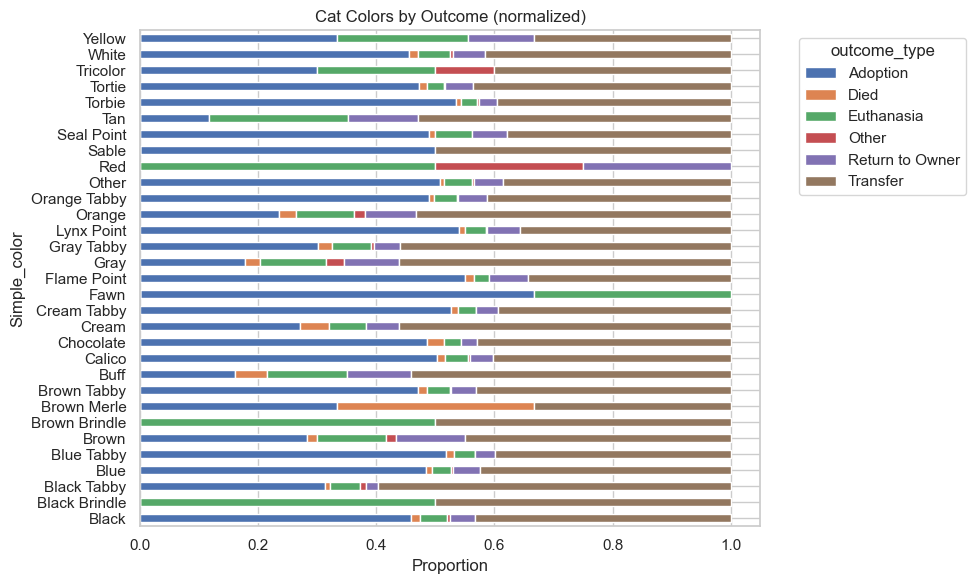

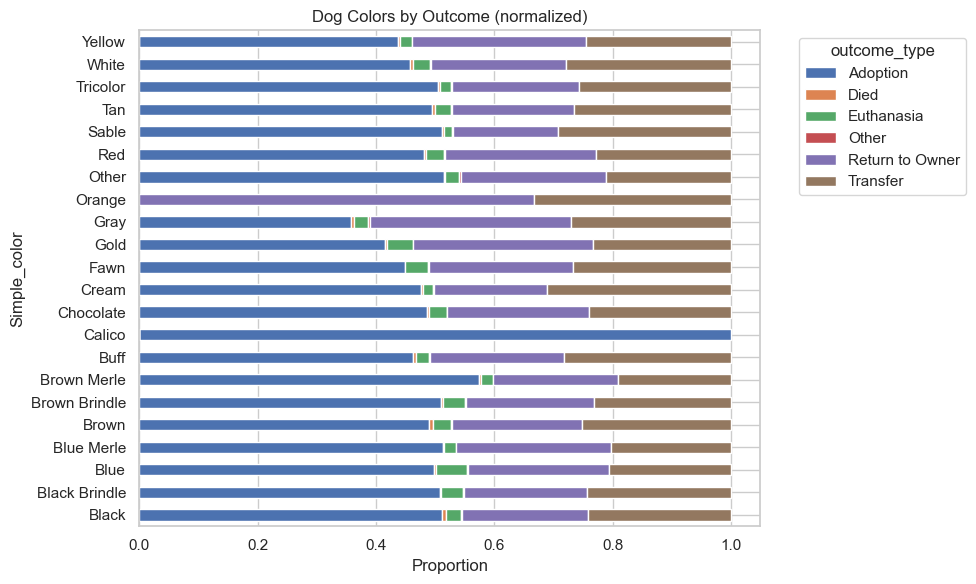

In [145]:
# Cats plot
plt.figure(figsize=(10,6))
normalized_stacked_bar(
    data=merged_df[merged_df['animal_type'] == 'Cat'],
    x='Simple_color',
    hue='outcome_type',
    title="Cat Colors by Outcome (normalized)",
)
plt.tight_layout()
plt.savefig("../figures/cats_colors_outcome.png", dpi=300)   # 300 dpi PNG
plt.show()

# Dogs plot
plt.figure(figsize=(10,6))
normalized_stacked_bar(
    data=merged_df[merged_df['animal_type'] == 'Dog'],
    x='Simple_color',
    hue='outcome_type',
    title="Dog Colors by Outcome (normalized)",
)
plt.tight_layout()
plt.savefig("../figures/dogs_colors_outcome.png", dpi=300)
plt.show()


In [146]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color'],
      dtype='object')

In [147]:
merged_df['is_multi_color'] = merged_df['color'].str.contains('/', na=False).astype(int)
merged_df['is_multi_color'].value_counts()

is_multi_color
1    71112
0    64094
Name: count, dtype: int64

In [148]:
merged_df.columns

Index(['animal_id', 'name', 'sex_upon_intake', 'age_upon_intake',
       'datetime_intake', 'visit_count', 'intake_type', 'intake_condition',
       'animal_type', 'breed', 'color', 'outcome_type', 'HasName',
       'age_days_intake', 'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color', 'is_multi_color'],
      dtype='object')

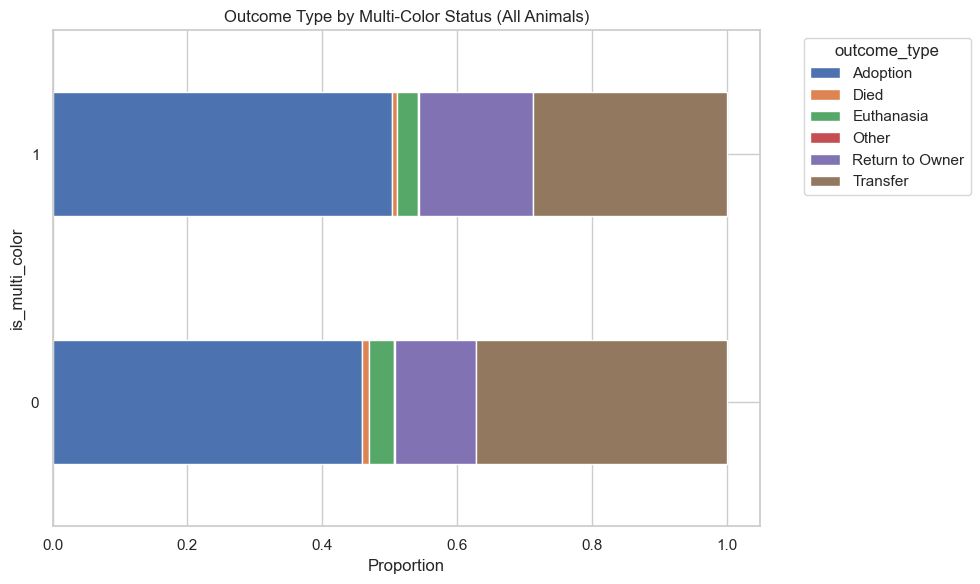

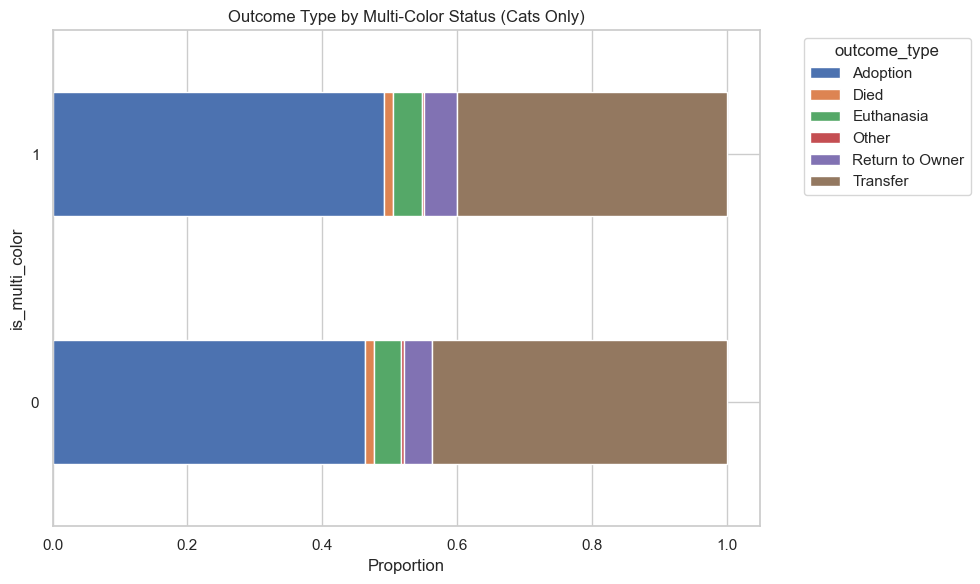

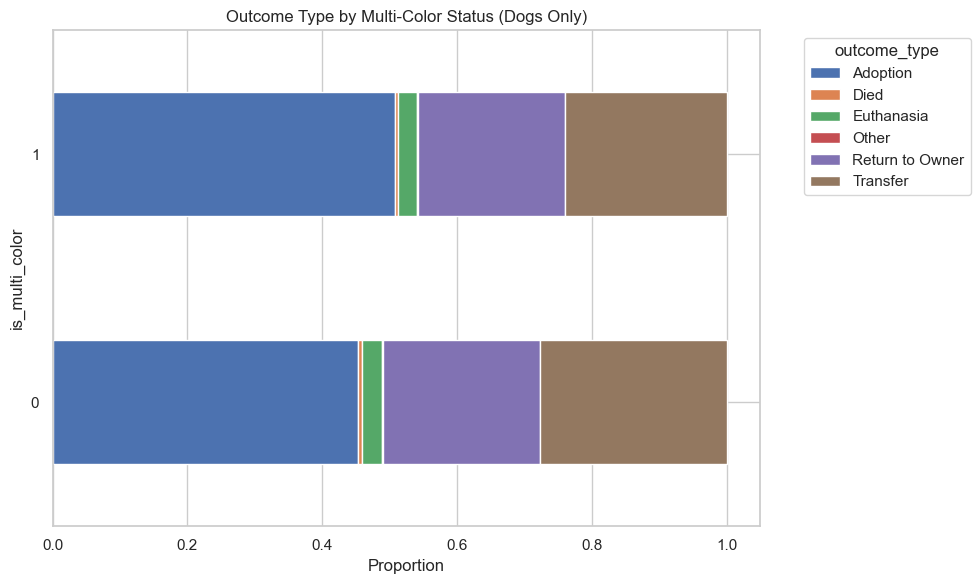

In [149]:
# Visualizing breed_popularity_tier vs Target

# All Animals
stacked_proportion_plot(
    merged_df,
    x="is_multi_color",
    hue="outcome_type",
    title="Outcome Type by Multi-Color Status (All Animals)",
    horizontal=True
)

#Cats
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()

stacked_proportion_plot(
    cats,
    x="is_multi_color",
    hue="outcome_type",
    title="Outcome Type by Multi-Color Status (Cats Only)",
    horizontal=True
)

# Dogs

dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

stacked_proportion_plot(
    dogs,
    x="is_multi_color",
    hue="outcome_type",
    title="Outcome Type by Multi-Color Status (Dogs Only)",
    horizontal=True
)


In [150]:
# Create name_length feature
merged_df["name_length"] = merged_df.apply(
    lambda row: len(str(row["name"]).strip()) if row["HasName"] == 1 else 0,
    axis=1
)

In [151]:
merged_df = merged_df.drop(columns=["name"])
merged_df.columns

Index(['animal_id', 'sex_upon_intake', 'age_upon_intake', 'datetime_intake',
       'visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color', 'is_multi_color', 'name_length'],
      dtype='object')

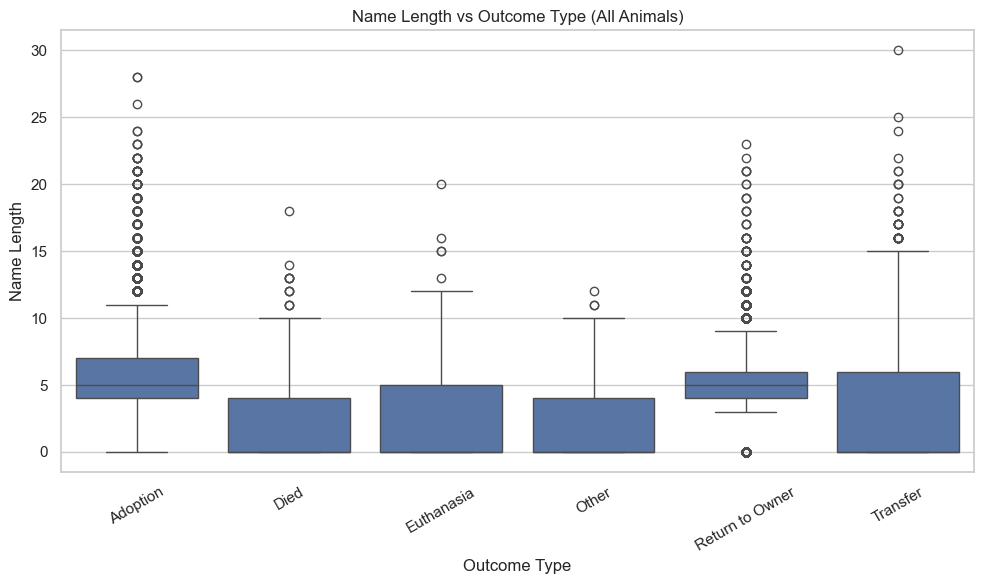

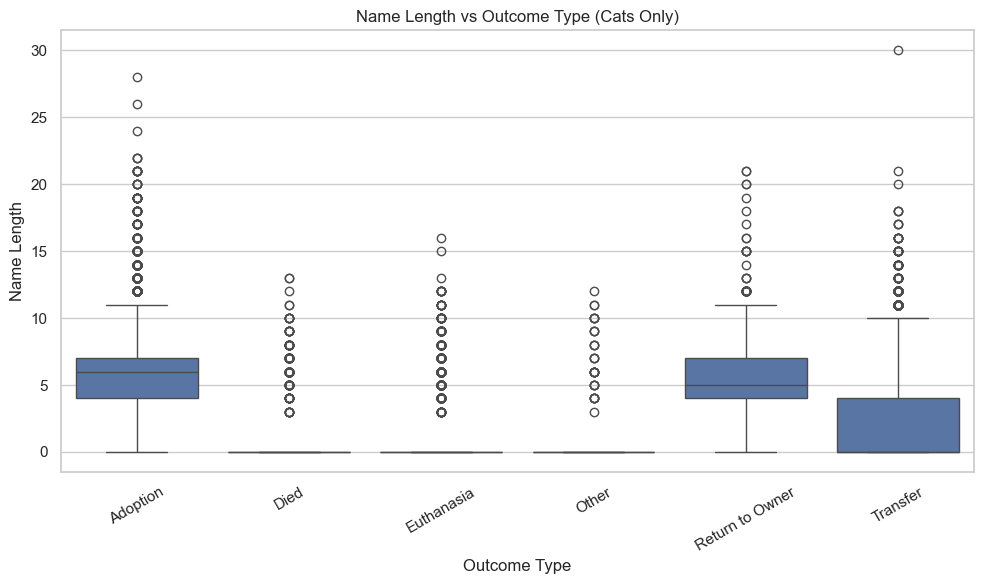

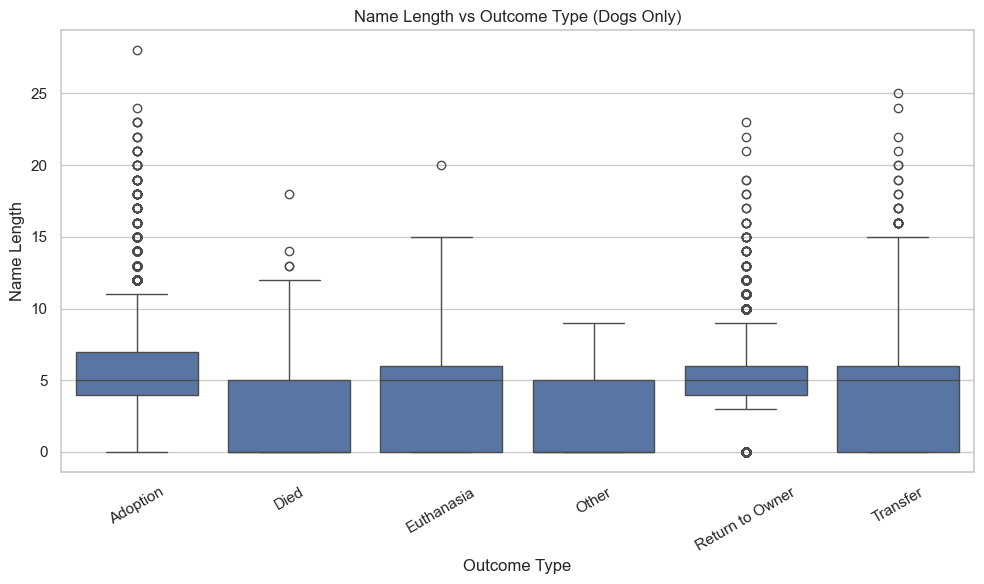

In [152]:
# Visualizing length of Name vs Target variable

import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_name_length(df, title):
    plt.figure(figsize=(10,6))
    sns.boxplot(
        data=df,
        x="outcome_type",
        y="name_length",
        order=sorted(df["outcome_type"].unique())
    )
    plt.title(title)
    plt.xlabel("Outcome Type")
    plt.ylabel("Name Length")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# ---------- All Animals ----------
boxplot_name_length(
    merged_df,
    "Name Length vs Outcome Type (All Animals)"
)

# ---------- Cats ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat']
boxplot_name_length(
    cats,
    "Name Length vs Outcome Type (Cats Only)"
)

# ---------- Dogs ----------
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog']
boxplot_name_length(
    dogs,
    "Name Length vs Outcome Type (Dogs Only)"
)


# Vizualizing sex and intactness

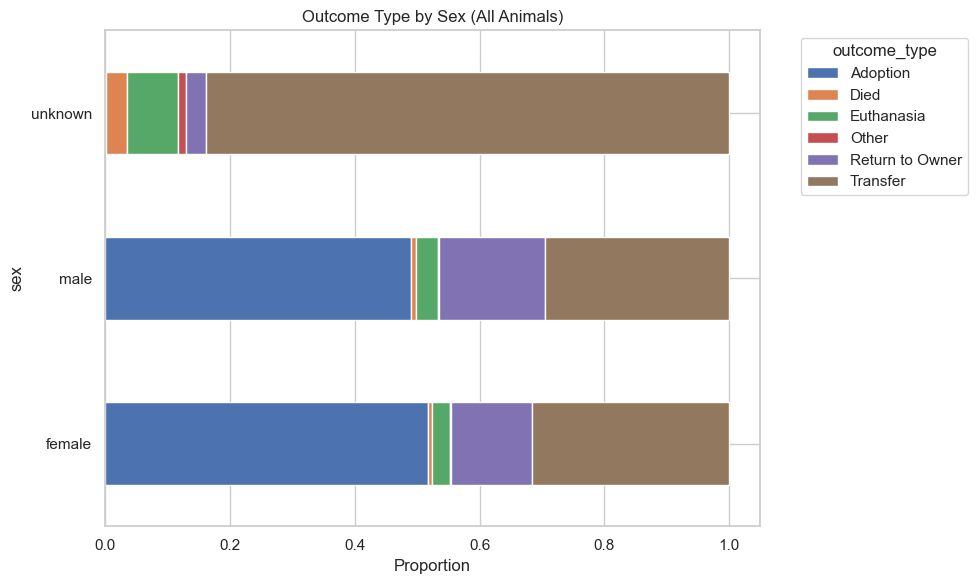

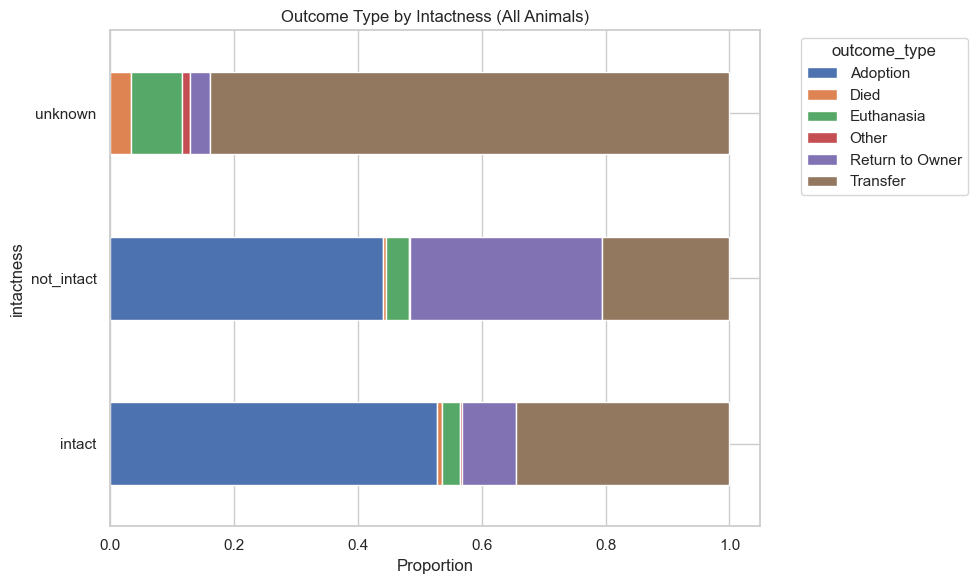

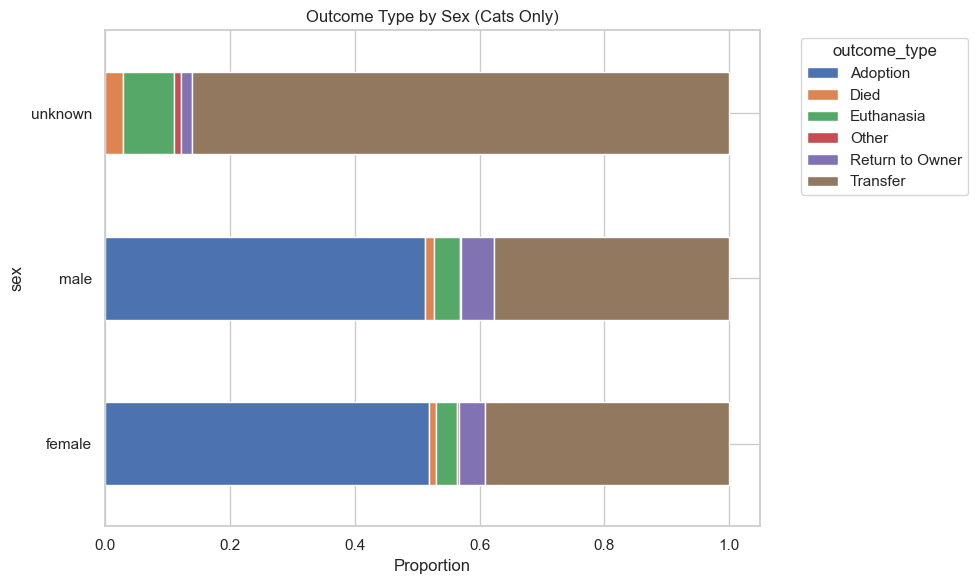

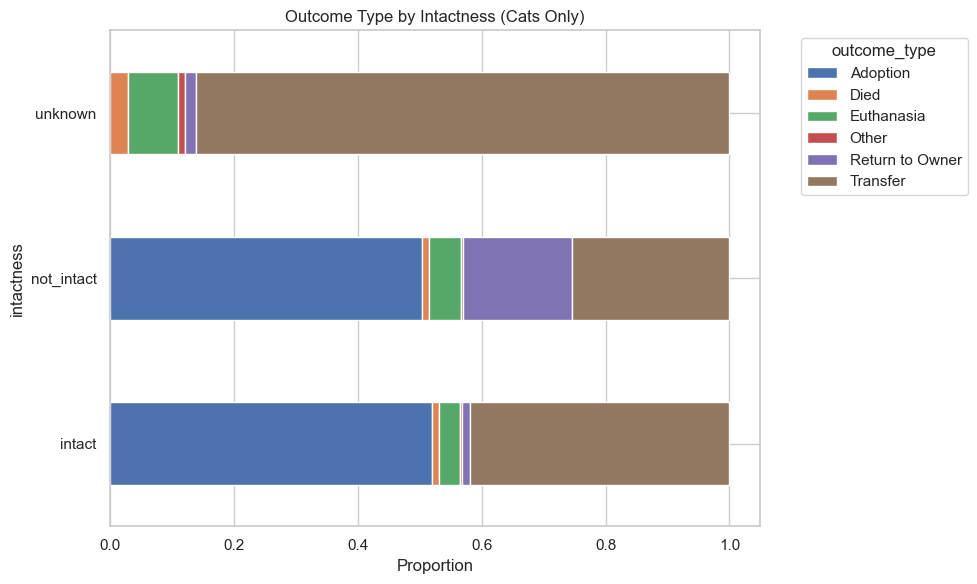

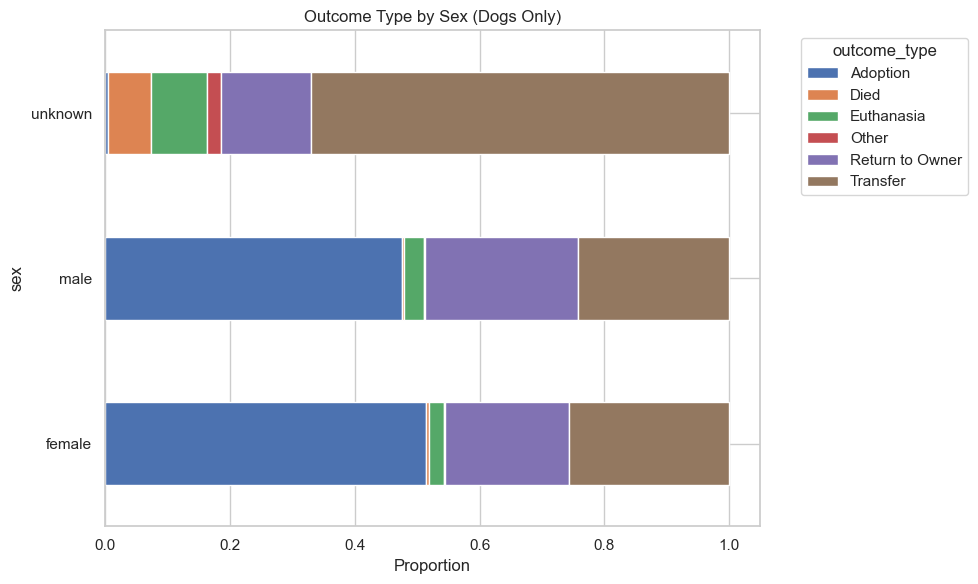

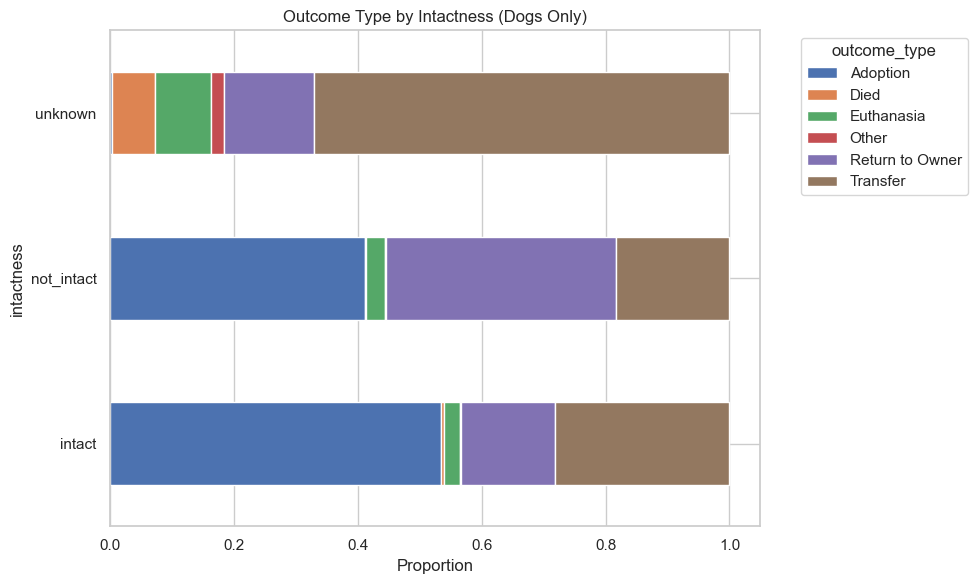

In [153]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("../figures", exist_ok=True)

# ---------- Helper: stacked proportion plot ----------
def stacked_proportion_plot(data, x, hue, title, ax=None):
    if ax is None:
        ax = plt.gca()

    ctab = pd.crosstab(data[x], data[hue], normalize='index')
    ctab.plot(kind='barh', stacked=True, ax=ax)

    ax.set_title(title)
    ax.set_xlabel("Proportion")
    ax.set_ylabel(x)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

    return ax

def save_stacked_plot(data, x, hue, title, filename):
    fig, ax = plt.subplots(figsize=(10, 6))
    stacked_proportion_plot(data, x, hue, title, ax=ax)
    fig.tight_layout()
    fig.savefig(f"../figures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()  
    plt.close(fig)

# ---------- Split data ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# ---------- Save all figures ----------

# All animals
save_stacked_plot(merged_df, x="sex",        hue="outcome_type",
                  title="Outcome Type by Sex (All Animals)",
                  filename="outcome_by_sex_all")

save_stacked_plot(merged_df, x="intactness", hue="outcome_type",
                  title="Outcome Type by Intactness (All Animals)",
                  filename="outcome_by_intactness_all")

# Cats
save_stacked_plot(cats, x="sex",        hue="outcome_type",
                  title="Outcome Type by Sex (Cats Only)",
                  filename="outcome_by_sex_cats")

save_stacked_plot(cats, x="intactness", hue="outcome_type",
                  title="Outcome Type by Intactness (Cats Only)",
                  filename="outcome_by_intactness_cats")

# Dogs
save_stacked_plot(dogs, x="sex",        hue="outcome_type",
                  title="Outcome Type by Sex (Dogs Only)",
                  filename="outcome_by_sex_dogs")

save_stacked_plot(dogs, x="intactness", hue="outcome_type",
                  title="Outcome Type by Intactness (Dogs Only)",
                  filename="outcome_by_intactness_dogs")


# intake_type vs Outcome:

In [154]:
merged_df['intake_type'].value_counts()

intake_type
Stray                 96571
Owner Surrender       28925
Public Assist          7899
Abandoned              1575
Euthanasia Request      235
Wildlife                  1
Name: count, dtype: int64

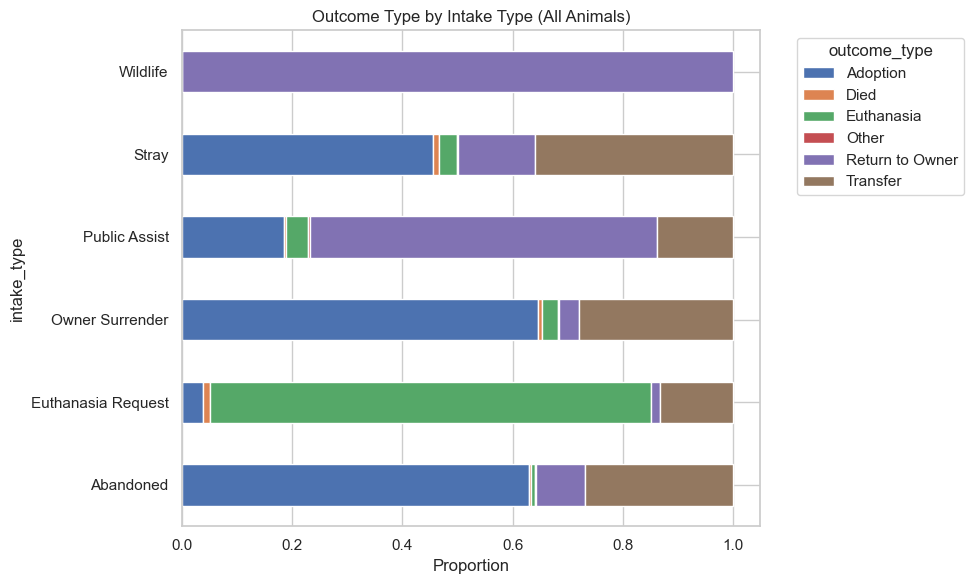

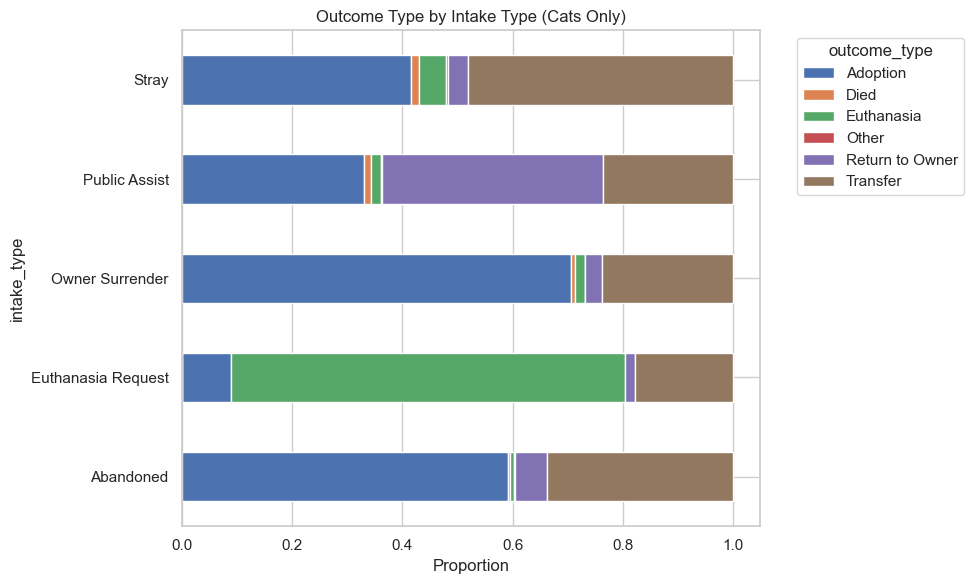

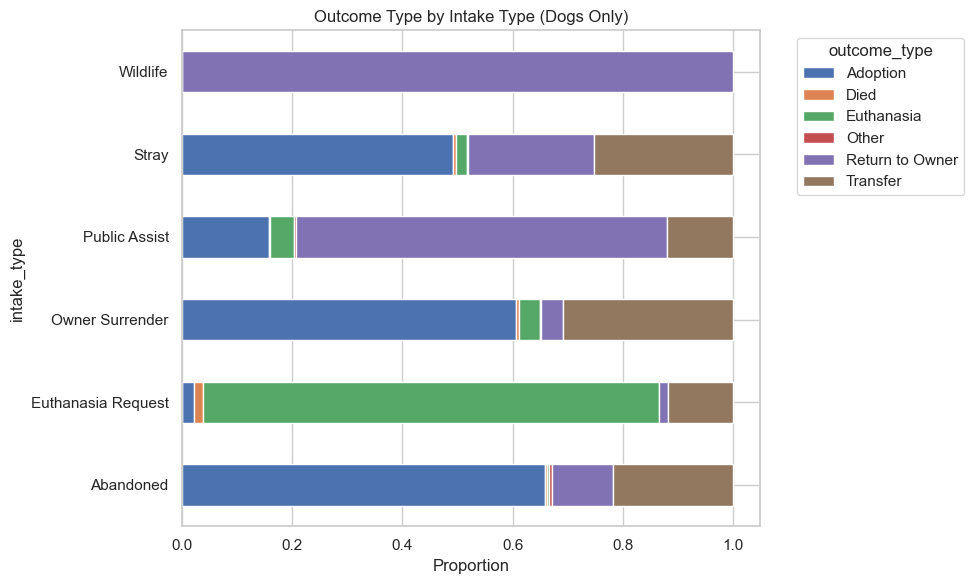

In [155]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Helper function ----------
def stacked_proportion_plot(data, x, hue, title, horizontal=False, ax=None):
    if ax is None:
        ax = plt.gca()

    ctab = pd.crosstab(data[x], data[hue], normalize='index')

    if horizontal:
        ctab.plot(kind='barh', stacked=True, ax=ax)
        ax.set_xlabel("Proportion")
        ax.set_ylabel(x)
    else:
        ctab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel("Proportion")
        ax.set_xlabel(x)

    ax.set_title(title)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

    return ax

def save_intake_plot(data, title, filename, horizontal=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    stacked_proportion_plot(
        data=data,
        x="intake_type",
        hue="outcome_type",
        title=title,
        horizontal=horizontal,
        ax=ax
    )
    fig.tight_layout()
    fig.savefig(f"../figures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()  
    plt.close(fig)

# ---------- Split data ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# ---------- Save all three figures ----------
save_intake_plot(
    merged_df,
    title="Outcome Type by Intake Type (All Animals)",
    filename="outcome_by_intaketype_all"
)

save_intake_plot(
    cats,
    title="Outcome Type by Intake Type (Cats Only)",
    filename="outcome_by_intaketype_cats"
)

save_intake_plot(
    dogs,
    title="Outcome Type by Intake Type (Dogs Only)",
    filename="outcome_by_intaketype_dogs"
)


# Intake condition vs outcome_type:

In [156]:
merged_df['intake_condition'].value_counts()

intake_condition
Normal        115080
Injured         8307
Sick            5426
Nursing         3067
Neonatal        1584
Medical          509
Aged             478
Other            290
Pregnant         133
Feral            122
Med Attn          75
Behavior          60
Unknown           23
Med Urgent        21
Neurologic        11
Parvo             11
Space              4
Agonal             3
Panleuk            1
Congenital         1
Name: count, dtype: int64

In [157]:
merged_df['is_normal'] = (merged_df['intake_condition'] == "Normal").astype(int)
print(merged_df[['intake_condition','is_normal']])


       intake_condition  is_normal
0                Normal          1
1                Normal          1
2               Injured          0
3                  Aged          0
4                Normal          1
...                 ...        ...
135201         Neonatal          0
135202         Neonatal          0
135203         Neonatal          0
135204           Normal          1
135205          Injured          0

[135206 rows x 2 columns]


In [158]:
merged_df['is_normal'].value_counts()

is_normal
1    115080
0     20126
Name: count, dtype: int64

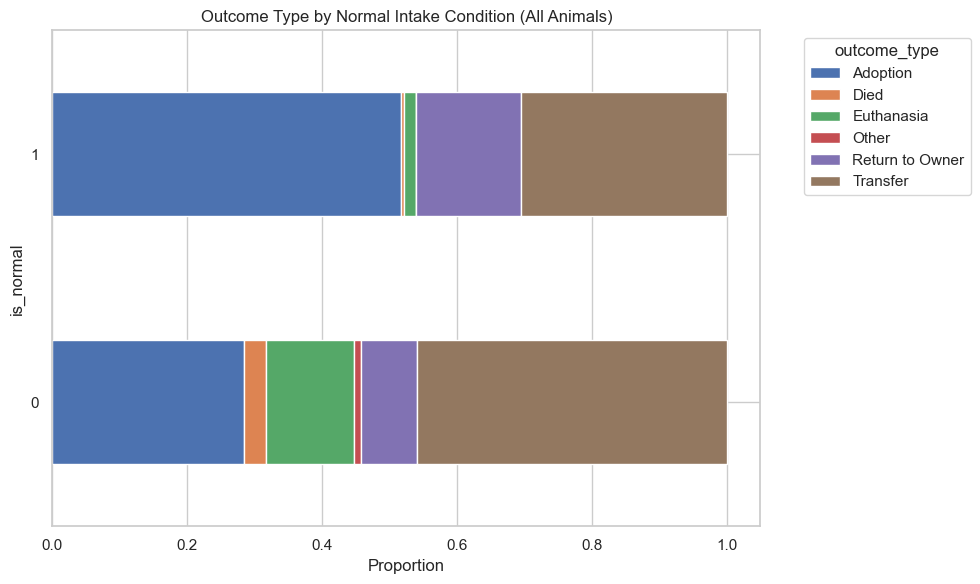

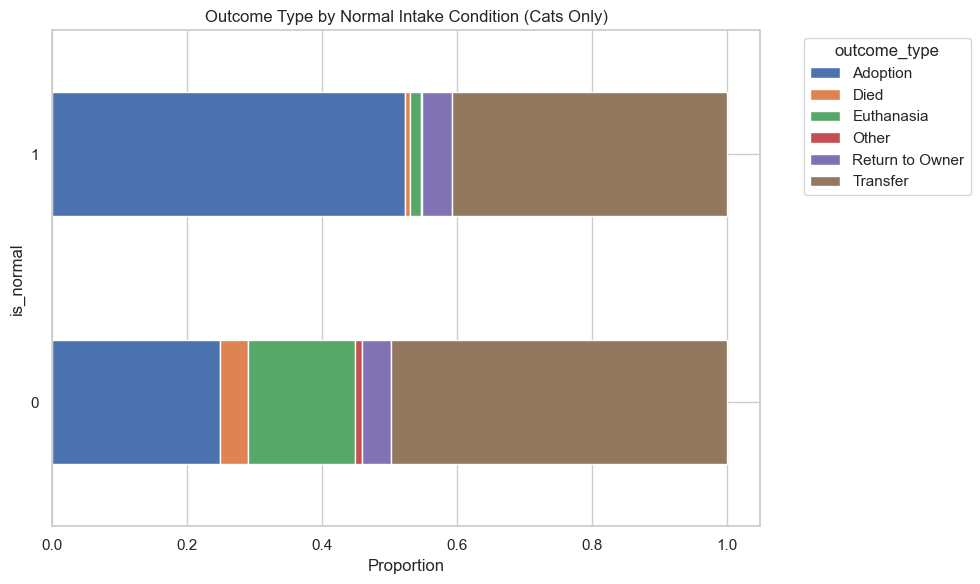

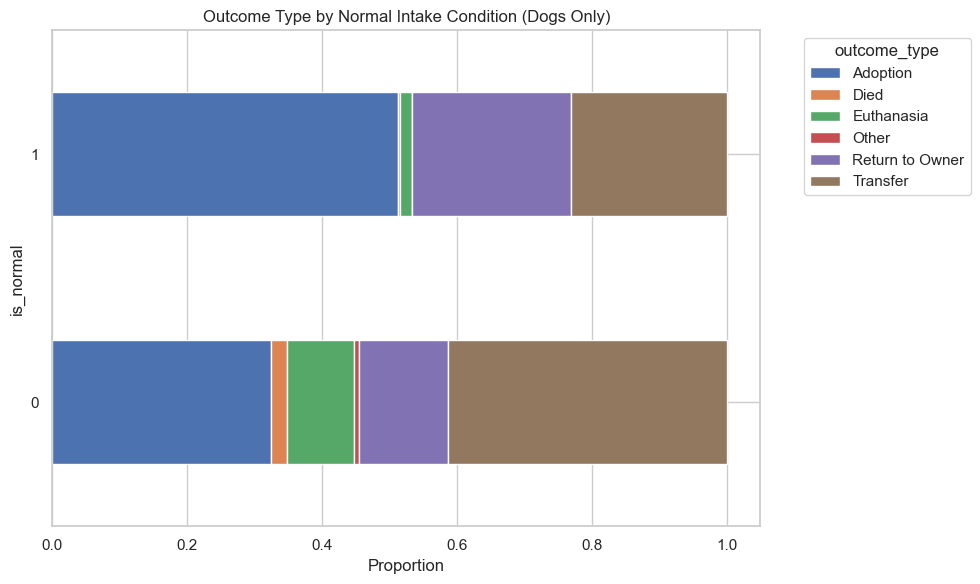

In [159]:
import os
import matplotlib.pyplot as plt

def save_normal_plot(data, title, filename, horizontal=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    stacked_proportion_plot(
        data=data,
        x="is_normal",
        hue="outcome_type",
        title=title,
        horizontal=horizontal,
        ax=ax          # <- important
    )
    fig.tight_layout()
    fig.savefig(f"../figures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close(fig)

# Split data
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# Save all three figures
save_normal_plot(
    merged_df,
    title="Outcome Type by Normal Intake Condition (All Animals)",
    filename="outcome_by_normalintake_all"
)

save_normal_plot(
    cats,
    title="Outcome Type by Normal Intake Condition (Cats Only)",
    filename="outcome_by_normalintake_cats"
)

save_normal_plot(
    dogs,
    title="Outcome Type by Normal Intake Condition (Dogs Only)",
    filename="outcome_by_normalintake_dogs"
)


In [160]:
merged_df.columns

Index(['animal_id', 'sex_upon_intake', 'age_upon_intake', 'datetime_intake',
       'visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color', 'is_multi_color', 'name_length', 'is_normal'],
      dtype='object')

<Axes: title={'center': 'Outcome Type by Animal Type (Proportions)'}, xlabel='Proportion', ylabel='animal_type'>

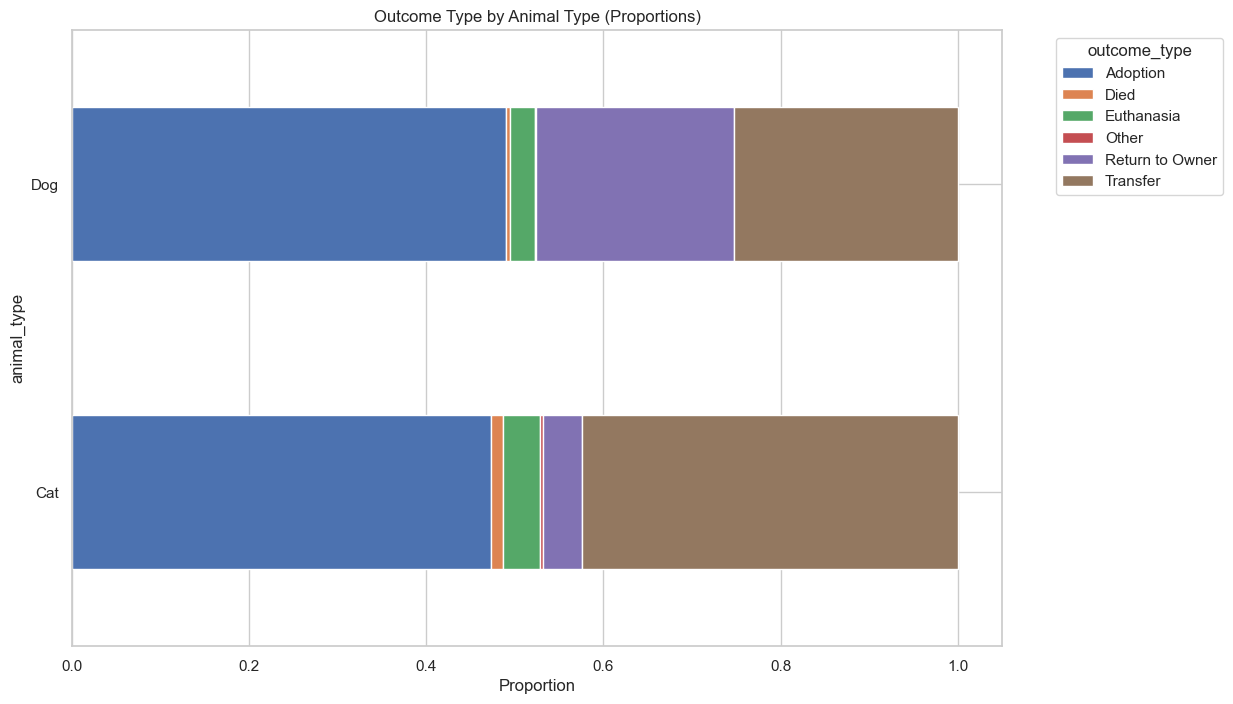

In [161]:
# ---------- Animal Type vs Outcome ----------
stacked_proportion_plot(
    merged_df,
    x="animal_type",
    hue="outcome_type",
    title="Outcome Type by Animal Type (Proportions)",
    horizontal=True
)


# HasName vs Outcome:

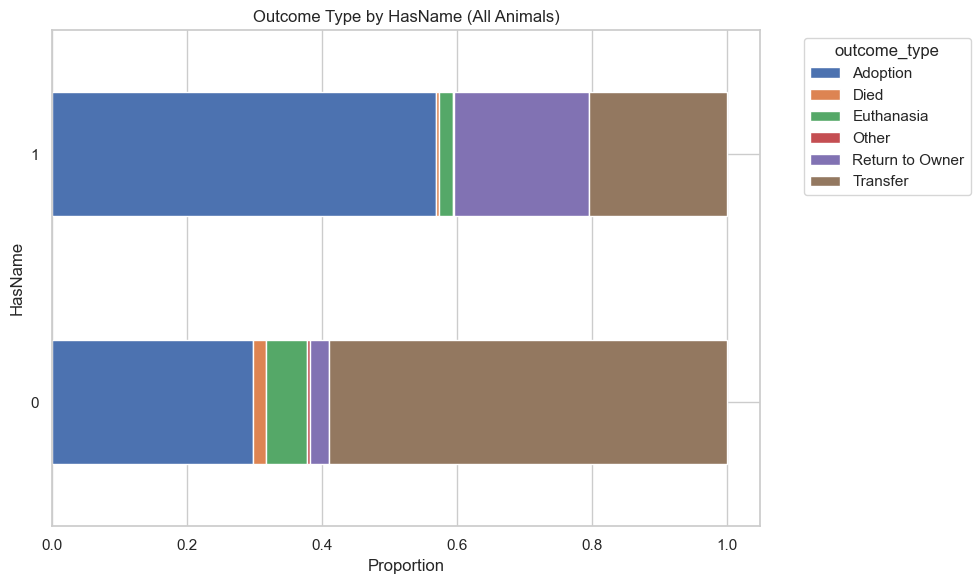

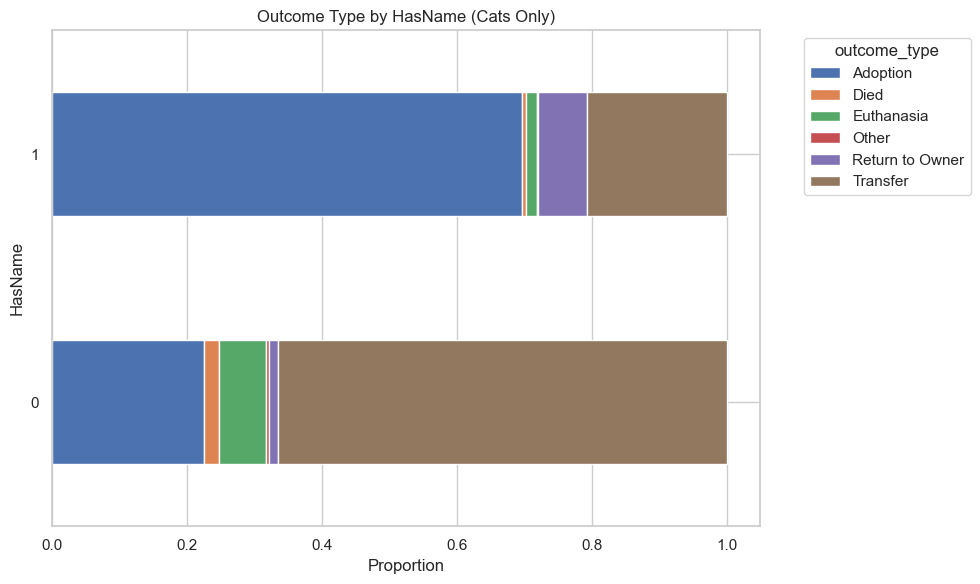

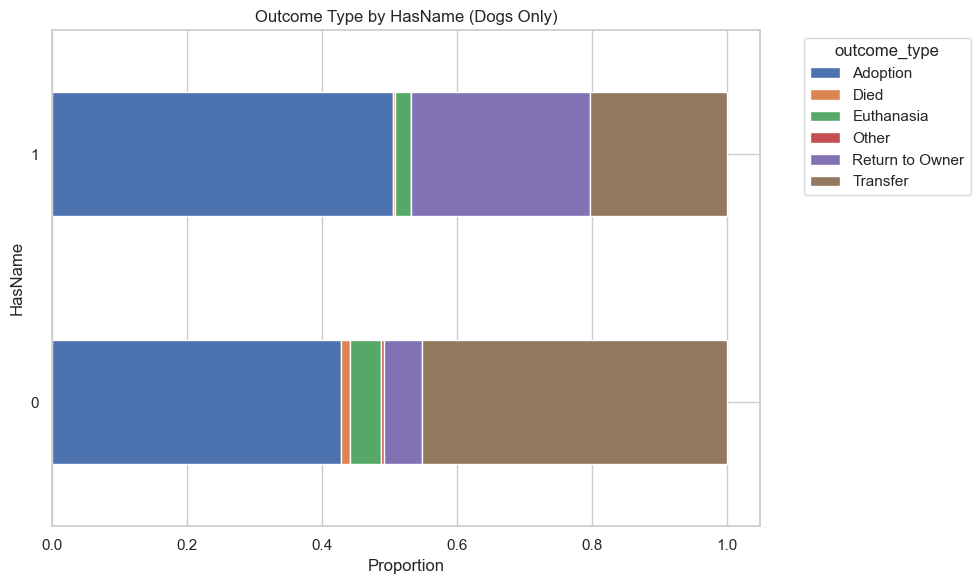

In [162]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# ----- Ax-aware helper (safe for saving) -----
def stacked_proportion_plot(data, x, hue, title, horizontal=False, ax=None):
    if ax is None:
        ax = plt.gca()

    ctab = pd.crosstab(data[x], data[hue], normalize='index')

    if horizontal:
        ctab.plot(kind='barh', stacked=True, ax=ax)
        ax.set_xlabel("Proportion")
        ax.set_ylabel(x)
    else:
        ctab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel("Proportion")
        ax.set_xlabel(x)

    ax.set_title(title)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    return ax

def save_hasname_plot(data, title, filename, horizontal=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    stacked_proportion_plot(
        data=data,
        x="HasName",
        hue="outcome_type",
        title=title,
        horizontal=horizontal,
        ax=ax
    )
    fig.tight_layout()
    fig.savefig(f"../figures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show() 
    plt.close(fig)

# ---------- Split data ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# ---------- Save all three figures ----------
save_hasname_plot(
    merged_df,
    title="Outcome Type by HasName (All Animals)",
    filename="outcome_by_hasname_all"
)

save_hasname_plot(
    cats,
    title="Outcome Type by HasName (Cats Only)",
    filename="outcome_by_hasname_cats"
)

save_hasname_plot(
    dogs,
    title="Outcome Type by HasName (Dogs Only)",
    filename="outcome_by_hasname_dogs"
)


# age_days visualized

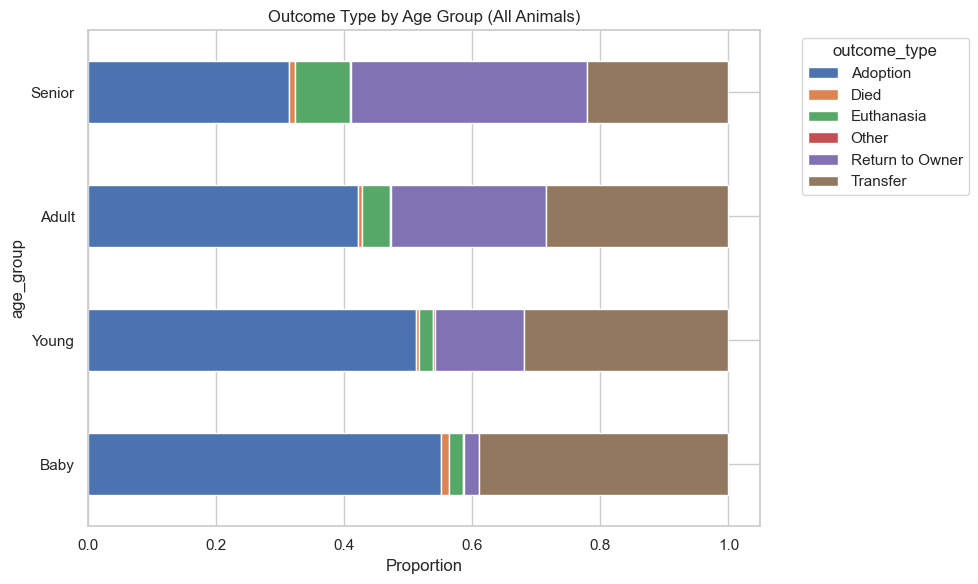

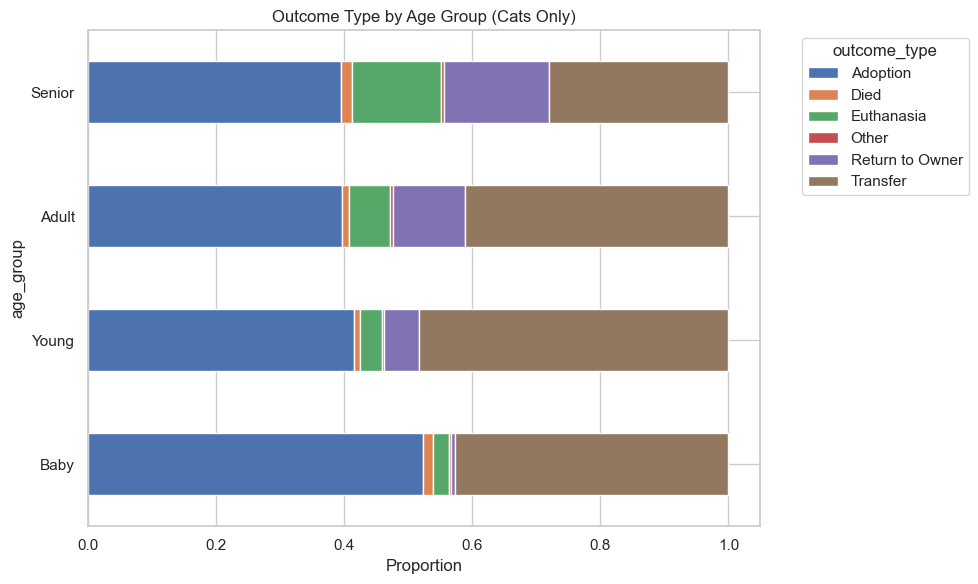

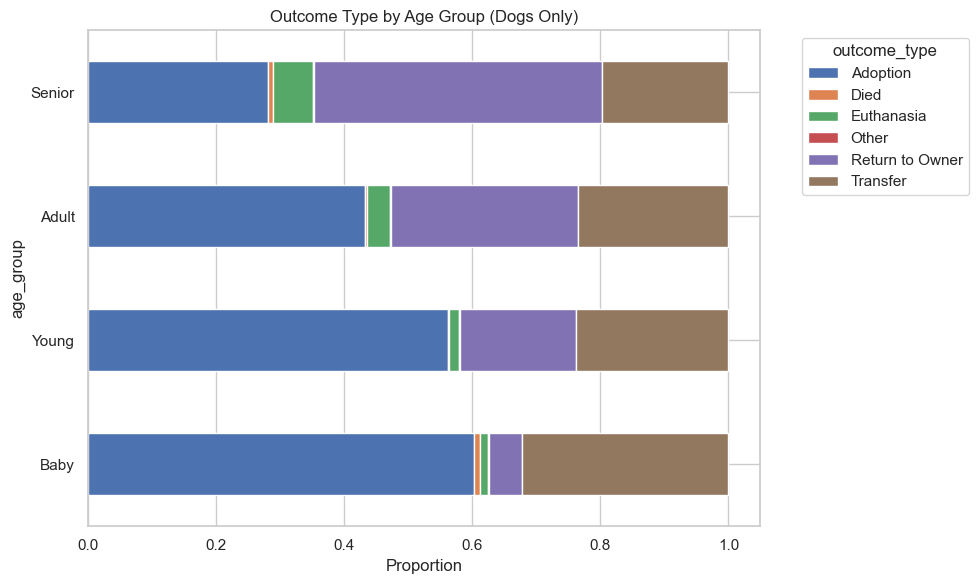

In [163]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ---------- Age categories (ORDINAL + ordered) ----------
def age_category(days):
    if days < 180:        # ~0-6 months
        return "Baby"
    elif days < 730:      # ~6 months - 2 years
        return "Young"
    elif days < 2555:     # ~2 - 7 years
        return "Adult"
    else:                 # 7+ years
        return "Senior"

merged_df['age_group'] = merged_df['age_days_intake'].apply(age_category)

age_order = ["Baby", "Young", "Adult", "Senior"]
merged_df["age_group"] = pd.Categorical(
    merged_df["age_group"],
    categories=age_order,
    ordered=True
)

# ---------- Ax-aware helper ----------
def stacked_proportion_plot(data, x, hue, title, horizontal=True, ax=None):
    if ax is None:
        ax = plt.gca()

    ctab = pd.crosstab(
        data[x],
        data[hue],
        normalize="index"
    )

    # If the feature is age_group, enforce order
    if x == "age_group":
        age_order = ["Baby", "Young", "Adult", "Senior"]
        ctab = ctab.reindex(age_order)

    if horizontal:
        ctab.plot(kind='barh', stacked=True, ax=ax)
        ax.set_xlabel("Proportion")
        ax.set_ylabel(x)
    else:
        ctab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_ylabel("Proportion")
        ax.set_xlabel(x)

    ax.set_title(title)
    ax.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

    return ax


def save_age_plot(data, title, filename, horizontal=True):
    fig, ax = plt.subplots(figsize=(10, 6))
    stacked_proportion_plot(
        data=data,
        x="age_group",
        hue="outcome_type",
        title=title,
        horizontal=horizontal,
        ax=ax
    )
    fig.tight_layout()
    fig.savefig(f"../figures/{filename}.png", dpi=300, bbox_inches="tight")
    plt.show()  
    plt.close(fig)

# ---------- Split data ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()

# ---------- Save all three figures ----------
save_age_plot(
    merged_df,
    title="Outcome Type by Age Group (All Animals)",
    filename="outcome_by_agegroup_all"
)

save_age_plot(
    cats,
    title="Outcome Type by Age Group (Cats Only)",
    filename="outcome_by_agegroup_cats"
)

save_age_plot(
    dogs,
    title="Outcome Type by Age Group (Dogs Only)",
    filename="outcome_by_agegroup_dogs"
)


In [164]:
merged_df.columns

Index(['animal_id', 'sex_upon_intake', 'age_upon_intake', 'datetime_intake',
       'visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color', 'is_multi_color', 'name_length', 'is_normal',
       'age_group'],
      dtype='object')

# Multiple visits or not vs outcome

<Axes: title={'center': 'Outcome Type by Return Visitor Status (All Animals)'}, xlabel='Proportion', ylabel='is_return_visitor'>

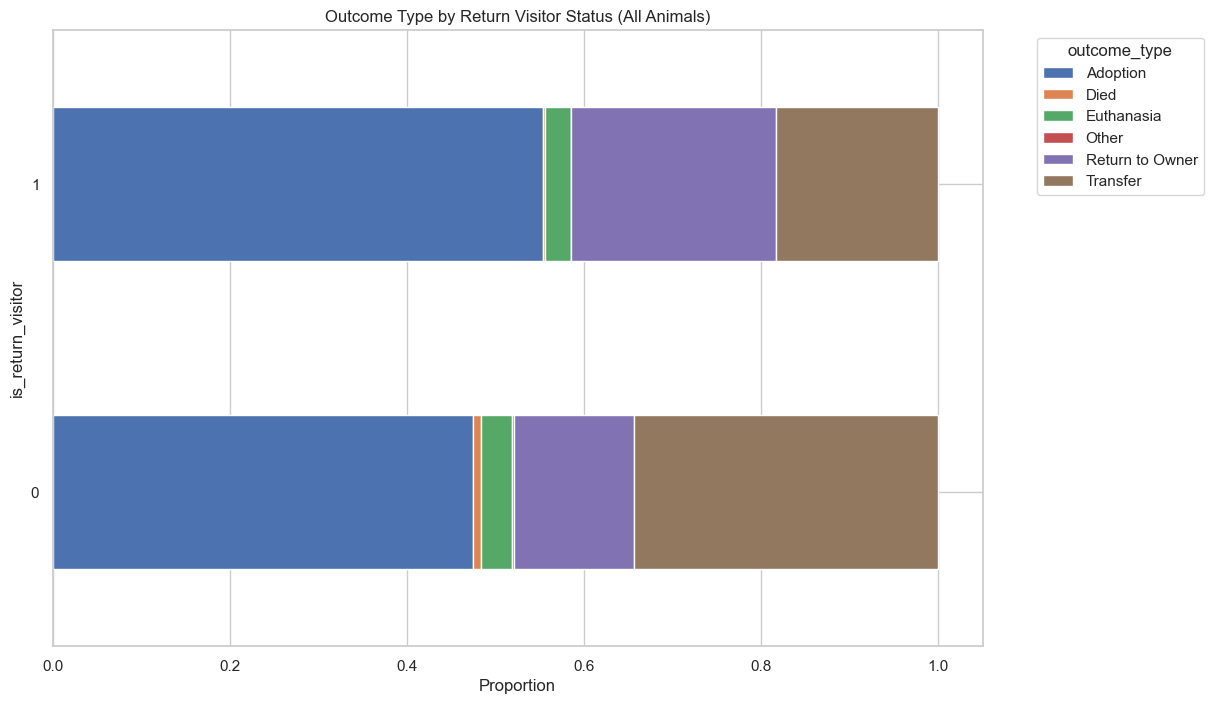

In [165]:
# Create binary feature: 0 for first-time, 1 for return visitors
merged_df['is_return_visitor'] = (merged_df['visit_count'] > 1).astype(int)

# ---------- All animals ----------
stacked_proportion_plot(
    merged_df,
    x="is_return_visitor",
    hue="outcome_type",
    title="Outcome Type by Return Visitor Status (All Animals)",
    horizontal=True
)

<Axes: title={'center': 'Outcome Type by Return Visitor Status (Cats Only)'}, xlabel='Proportion', ylabel='is_return_visitor'>

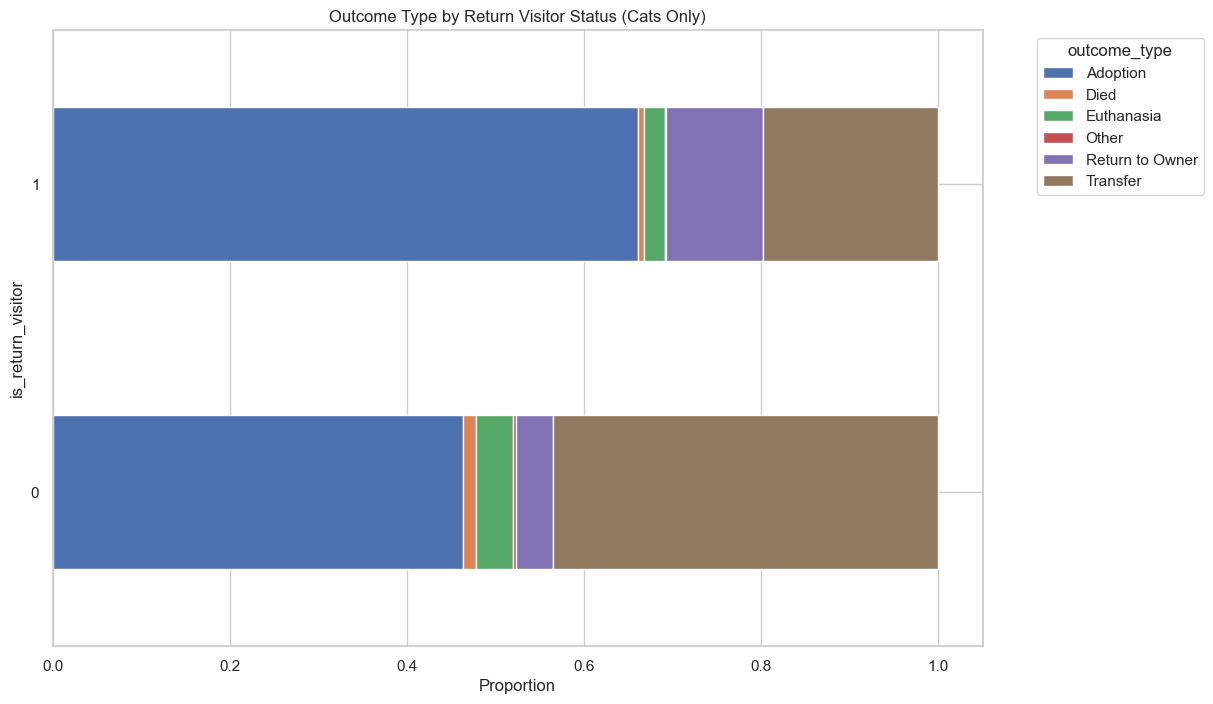

In [166]:
# ---------- Cats only ----------
cats = merged_df[merged_df['animal_type'].str.lower() == 'cat'].copy()
stacked_proportion_plot(
    cats,
    x="is_return_visitor",
    hue="outcome_type",
    title="Outcome Type by Return Visitor Status (Cats Only)",
    horizontal=True
)

<Axes: title={'center': 'Outcome Type by Return Visitor Status (Dogs Only)'}, xlabel='Proportion', ylabel='is_return_visitor'>

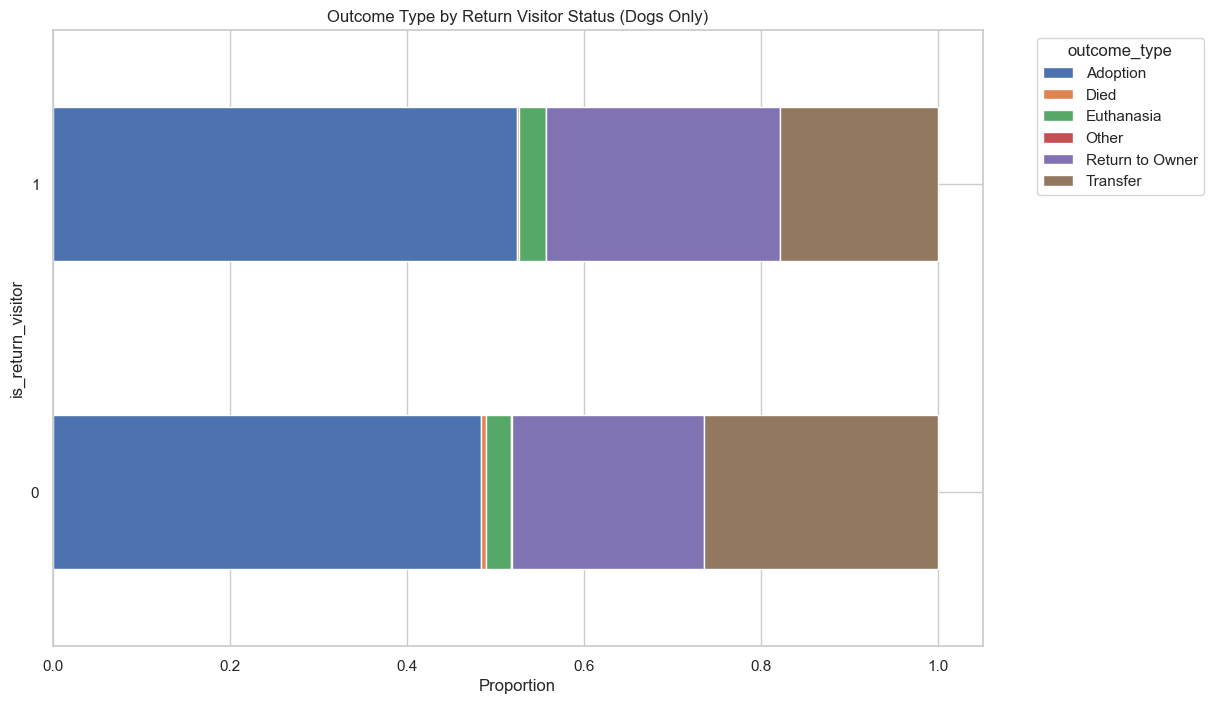

In [167]:
# ---------- Dogs only ----------
dogs = merged_df[merged_df['animal_type'].str.lower() == 'dog'].copy()
stacked_proportion_plot(
    dogs,
    x="is_return_visitor",
    hue="outcome_type",
    title="Outcome Type by Return Visitor Status (Dogs Only)",
    horizontal=True
)

In [168]:
merged_df['is_return_visitor'].value_counts()

is_return_visitor
0    122039
1     13167
Name: count, dtype: int64

C:\Users\Vinayak Mokashi\AppData\Local\Temp\ipykernel_28604\109346399.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


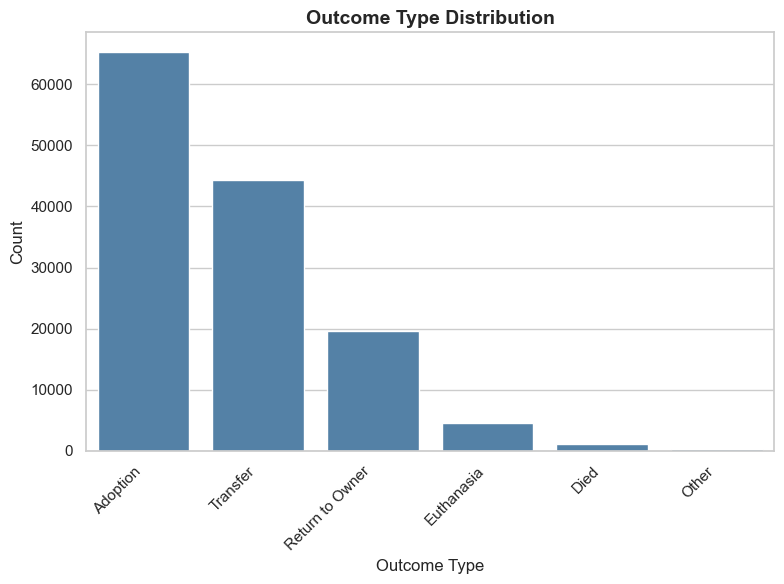

In [170]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts for outcome_type
outcome_counts = merged_df['outcome_type'].value_counts()

# Plot + save
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x=outcome_counts.index,
            y=outcome_counts.values,
            color="steelblue",
            ax=ax)

ax.set_title("Outcome Type Distribution", fontsize=14, fontweight="bold")
ax.set_xlabel("Outcome Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()
fig.savefig("../figures/outcome_type_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)


C:\Users\Vinayak Mokashi\AppData\Local\Temp\ipykernel_28604\1296919853.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


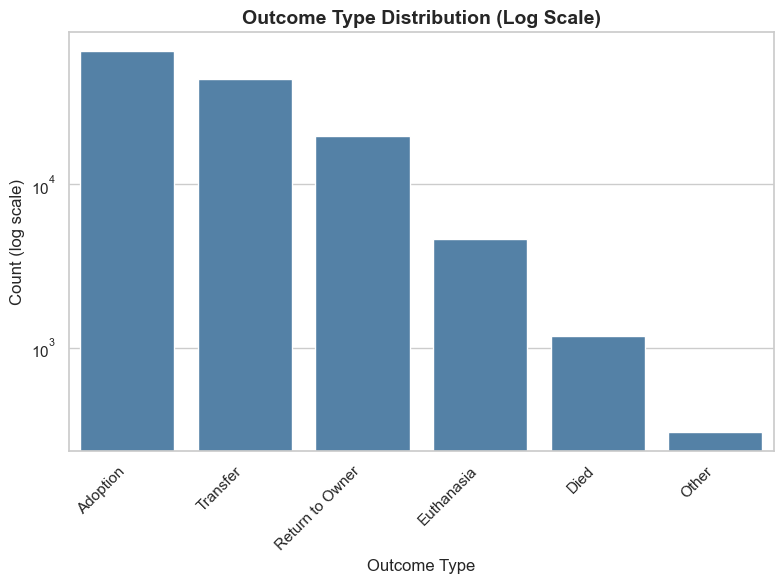

In [171]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("../figures", exist_ok=True)

# Value counts
outcome_counts = merged_df['outcome_type'].value_counts()

# Plot + save
fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x=outcome_counts.index,
    y=outcome_counts.values,
    color="steelblue",
    ax=ax
)

ax.set_yscale("log")  # log scale
ax.set_title("Outcome Type Distribution (Log Scale)", fontsize=14, fontweight="bold")
ax.set_xlabel("Outcome Type", fontsize=12)
ax.set_ylabel("Count (log scale)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.tight_layout()
fig.savefig("../figures/outcome_type_distribution_log.png",
            dpi=300, bbox_inches="tight")

plt.show()
plt.close(fig)


In [172]:
merged_df.columns

Index(['animal_id', 'sex_upon_intake', 'age_upon_intake', 'datetime_intake',
       'visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month', 'intake_month_num', 'intake_weekday',
       'intake_weekday_num', 'intake_week', 'intake_hour', 'intake_quarter',
       'is_weekend', 'intake_season', 'intake_am_pm', 'intake_part_of_day',
       'intactness', 'sex', 'Simple_breed', 'IsMix', 'breed_popularity_tier',
       'Simple_color', 'is_multi_color', 'name_length', 'is_normal',
       'age_group', 'is_return_visitor'],
      dtype='object')

In [173]:
len(merged_df.columns)

35

In [174]:
# columns to keep
cols = [
    "visit_count",
    "intake_type",
    "intake_condition",
    "animal_type",
    "breed",
    "color",
    "outcome_type",
    "HasName",
    "age_days_intake",
    "intake_month_num",
    "intake_weekday_num",
    "intake_hour",
    "intactness",
    "sex"
]

# keep only these columns
data_for_modelling = merged_df[cols].copy()

# export to csv
data_for_modelling.to_csv("../data/data_for_modelling.csv", index=False)

print("Done! Saved as data_for_modelling.csv")


Done! Saved as data_for_modelling.csv


In [175]:
data_for_modelling.columns

Index(['visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month_num', 'intake_weekday_num', 'intake_hour', 'intactness',
       'sex'],
      dtype='object')

In [176]:
len(data_for_modelling.columns)

14

In [177]:
data_for_modelling.columns

Index(['visit_count', 'intake_type', 'intake_condition', 'animal_type',
       'breed', 'color', 'outcome_type', 'HasName', 'age_days_intake',
       'intake_month_num', 'intake_weekday_num', 'intake_hour', 'intactness',
       'sex'],
      dtype='object')